In [1]:
%load_ext autoreload
%autoreload 2
from util import util
import numpy as np

/opt/miniconda2/envs/py36h2o/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# train signals
%store -r signal_1_1_hor
%store -r signal_1_2_hor
%store -r signal_1_1_vert
%store -r signal_1_2_vert

%store -r signal_2_1_hor
%store -r signal_2_2_hor
%store -r signal_2_1_vert
%store -r signal_2_2_vert

%store -r signal_3_1_hor
%store -r signal_3_2_hor
%store -r signal_3_1_vert
%store -r signal_3_2_vert

# test signals
%store -r signal_1_3_hor
%store -r signal_1_4_hor
%store -r signal_1_5_hor
%store -r signal_1_6_hor
%store -r signal_1_7_hor
%store -r signal_1_3_vert
%store -r signal_1_4_vert
%store -r signal_1_5_vert
%store -r signal_1_6_vert
%store -r signal_1_7_vert

%store -r signal_2_3_hor
%store -r signal_2_4_hor
%store -r signal_2_5_hor
%store -r signal_2_6_hor
%store -r signal_2_7_hor
%store -r signal_2_3_vert
%store -r signal_2_4_vert
%store -r signal_2_5_vert
%store -r signal_2_6_vert
%store -r signal_2_7_vert

%store -r signal_3_3_hor
%store -r signal_3_3_vert

hor_train = [signal_1_1_hor, signal_1_2_hor, signal_2_1_hor, signal_2_2_hor, signal_3_1_hor, signal_3_2_hor]
vert_train = [signal_1_1_vert, signal_1_2_vert, signal_2_1_vert, signal_2_2_vert, signal_3_1_vert, signal_3_2_vert]

hor_test = [signal_1_3_hor, signal_1_4_hor, signal_1_5_hor, signal_1_6_hor, signal_1_7_hor,
            signal_2_3_hor, signal_2_4_hor, signal_2_5_hor, signal_2_6_hor, signal_2_7_hor,
            signal_3_3_hor]
vert_test = [signal_1_3_vert, signal_1_4_vert, signal_1_5_vert, signal_1_6_vert, signal_1_7_vert,
             signal_2_3_vert, signal_2_4_vert, signal_2_5_vert, signal_2_6_vert, signal_2_7_vert,
             signal_3_3_vert]

spectros_train_hor = [util.getSpectro(signal) for signal in hor_train]
spectros_train_vert = [util.getSpectro(signal) for signal in vert_train]

spectros_test_hor = [util.getSpectro(signal) for signal in hor_test]
spectros_test_vert = [util.getSpectro(signal) for signal in vert_test]

In [3]:
# parameters
expName = 'b123_hor_vert'

testspecs = [
    ['1_3', 5730],
    ['1_4', 339],
    ['1_5', 1610],
    ['1_6', 1460],
    ['1_7', 7570],
    ['2_3', 7530],
    ['2_4', 1390],
    ['2_5', 3090],
    ['2_6', 1290],
    ['2_7', 580],
    ['3_3', 820]
]

### bepaal X en Y voor trainen

In [4]:
X_train = np.concatenate((np.concatenate(spectros_train_hor, axis=0),
                          np.concatenate(spectros_train_vert, axis=0)), 
                          axis=1)
print(np.shape(X_train))

Y_train = []
for spectro in spectros_train_hor:
    nr_samples = len(spectro)
    Y_train_nw = np.array([10 * (nr_samples - i) for i in range(1, nr_samples +1)])
    Y_train = np.append(Y_train, Y_train_nw)
    
print(np.shape(Y_train))

(7534, 2562)
(7534,)


## train modellen

In [5]:
layersizes = [600,300,150,25]
epochss = [50, 100, 200, 500]

Epoch 1/50
7534/7534 [==============================] - 9s 1ms/step - loss: 79736776.3929
Epoch 2/50
7534/7534 [==============================] - 8s 1ms/step - loss: 49274493.8519
Epoch 3/50
7534/7534 [==============================] - 8s 1ms/step - loss: 45740318.6573
Epoch 4/50
7534/7534 [==============================] - 8s 1ms/step - loss: 42044809.3284
Epoch 5/50
7534/7534 [==============================] - 8s 1ms/step - loss: 38590069.2254
Epoch 6/50
7534/7534 [==============================] - 8s 1ms/step - loss: 35889115.3109
Epoch 7/50
7534/7534 [==============================] - 8s 1ms/step - loss: 32041020.7048
Epoch 8/50
7534/7534 [==============================] - 8s 1ms/step - loss: 23124698.4736
Epoch 9/50
7534/7534 [==============================] - 8s 1ms/step - loss: 10553918.3836
Epoch 10/50
7534/7534 [==============================] - 8s 1ms/step - loss: 7329648.7920
Epoch 11/50
7534/7534 [==============================] - 8s 1ms/step - loss: 6404994.2129
Epoch 12/5

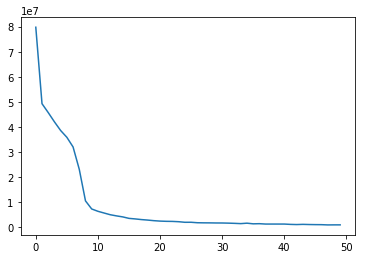

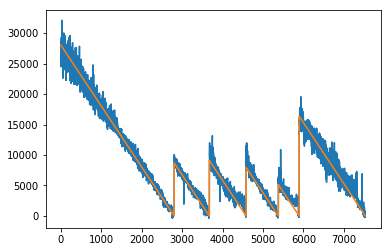

Epoch 1/100
7534/7534 [==============================] - 8s 1ms/step - loss: 78566810.2660
Epoch 2/100
7534/7534 [==============================] - 9s 1ms/step - loss: 48690962.7364
Epoch 3/100
7534/7534 [==============================] - 8s 1ms/step - loss: 44138576.0642
Epoch 4/100
7534/7534 [==============================] - 8s 1ms/step - loss: 40008336.3363
Epoch 5/100
7534/7534 [==============================] - 8s 1ms/step - loss: 37327682.8702
Epoch 6/100
7534/7534 [==============================] - 8s 1ms/step - loss: 34706853.2827
Epoch 7/100
7534/7534 [==============================] - 8s 1ms/step - loss: 29778877.5928
Epoch 8/100
7534/7534 [==============================] - 8s 1ms/step - loss: 20025715.1025
Epoch 9/100
7534/7534 [==============================] - 8s 1ms/step - loss: 9855587.1722
Epoch 10/100
7534/7534 [==============================] - 8s 1ms/step - loss: 7427087.4457
Epoch 11/100
7534/7534 [==============================] - 8s 1ms/step - loss: 6857525.1667


7534/7534 [==============================] - 7s 879us/step - loss: 949642.1424
Epoch 92/100
7534/7534 [==============================] - 7s 877us/step - loss: 932906.7265
Epoch 93/100
7534/7534 [==============================] - 7s 873us/step - loss: 864403.0521
Epoch 94/100
7534/7534 [==============================] - 7s 886us/step - loss: 857025.9501
Epoch 95/100
7534/7534 [==============================] - 7s 890us/step - loss: 854765.1194
Epoch 96/100
7534/7534 [==============================] - 7s 892us/step - loss: 809015.3133
Epoch 97/100
7534/7534 [==============================] - 7s 869us/step - loss: 793079.4285
Epoch 98/100
7534/7534 [==============================] - 7s 875us/step - loss: 816962.6180
Epoch 99/100
7534/7534 [==============================] - 7s 874us/step - loss: 795565.9355
Epoch 100/100
7534/7534 [==============================] - 7s 875us/step - loss: 750004.3838


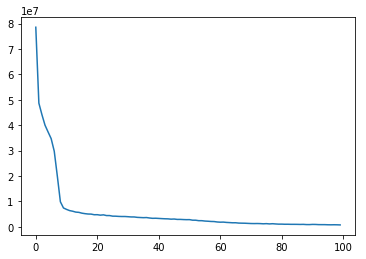

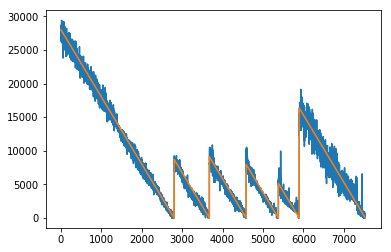

Epoch 1/200
7534/7534 [==============================] - 7s 969us/step - loss: 77991718.0165
Epoch 2/200
7534/7534 [==============================] - 7s 935us/step - loss: 48417358.7162
Epoch 3/200
7534/7534 [==============================] - 7s 913us/step - loss: 44051910.0621
Epoch 4/200
7534/7534 [==============================] - 7s 892us/step - loss: 39890329.1771
Epoch 5/200
7534/7534 [==============================] - 7s 899us/step - loss: 37149049.5715
Epoch 6/200
7534/7534 [==============================] - 7s 908us/step - loss: 34392276.8882
Epoch 7/200
7534/7534 [==============================] - 7s 893us/step - loss: 27798799.9151
Epoch 8/200
7534/7534 [==============================] - 7s 893us/step - loss: 15482010.7515
Epoch 9/200
7534/7534 [==============================] - 7s 899us/step - loss: 8072158.0696
Epoch 10/200
7534/7534 [==============================] - 7s 892us/step - loss: 6764197.3005
Epoch 11/200
7534/7534 [==============================] - 7s 901us/step

7534/7534 [==============================] - 7s 892us/step - loss: 392067.2044
Epoch 178/200
7534/7534 [==============================] - 7s 891us/step - loss: 406592.3160
Epoch 179/200
7534/7534 [==============================] - 7s 890us/step - loss: 410510.4781
Epoch 180/200
7534/7534 [==============================] - 7s 888us/step - loss: 441011.8006
Epoch 181/200
7534/7534 [==============================] - 7s 892us/step - loss: 385480.8624
Epoch 182/200
7534/7534 [==============================] - 7s 892us/step - loss: 398292.8147
Epoch 183/200
7534/7534 [==============================] - 7s 889us/step - loss: 403099.0780
Epoch 184/200
7534/7534 [==============================] - 7s 894us/step - loss: 381502.9147
Epoch 185/200
7534/7534 [==============================] - 7s 894us/step - loss: 372066.2965
Epoch 186/200
7534/7534 [==============================] - 7s 891us/step - loss: 421606.0218
Epoch 187/200
7534/7534 [==============================] - 7s 890us/step - loss: 427

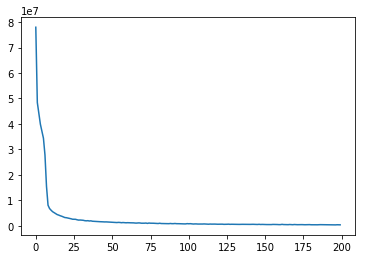

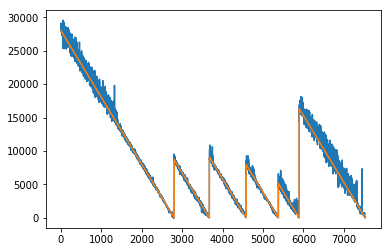

Epoch 1/500
7534/7534 [==============================] - 7s 980us/step - loss: 81168880.3701
Epoch 2/500
7534/7534 [==============================] - 7s 933us/step - loss: 49309349.4107
Epoch 3/500
7534/7534 [==============================] - 7s 913us/step - loss: 45046850.0855
Epoch 4/500
7534/7534 [==============================] - 7s 895us/step - loss: 40857995.2079
Epoch 5/500
7534/7534 [==============================] - 7s 909us/step - loss: 37914610.1508
Epoch 6/500
7534/7534 [==============================] - 7s 917us/step - loss: 35778784.7868
Epoch 7/500
7534/7534 [==============================] - 7s 893us/step - loss: 32629723.8609
Epoch 8/500
7534/7534 [==============================] - 7s 891us/step - loss: 26716529.6225
Epoch 9/500
7534/7534 [==============================] - 7s 895us/step - loss: 16524332.1558
Epoch 10/500
7534/7534 [==============================] - 7s 893us/step - loss: 9394534.0737
Epoch 11/500
7534/7534 [==============================] - 7s 905us/ste

7534/7534 [==============================] - 7s 930us/step - loss: 1109071.6112
Epoch 90/500
7534/7534 [==============================] - 7s 916us/step - loss: 1110476.7794
Epoch 91/500
7534/7534 [==============================] - 7s 888us/step - loss: 1004952.3731
Epoch 92/500
7534/7534 [==============================] - 7s 887us/step - loss: 1011268.8484
Epoch 93/500
7534/7534 [==============================] - 7s 896us/step - loss: 1011969.8492
Epoch 94/500
7534/7534 [==============================] - 7s 908us/step - loss: 1062857.2585
Epoch 95/500
7534/7534 [==============================] - 7s 899us/step - loss: 1025971.4611
Epoch 96/500
7534/7534 [==============================] - 7s 898us/step - loss: 940200.6271
Epoch 97/500
7534/7534 [==============================] - 7s 892us/step - loss: 938354.7809
Epoch 98/500
7534/7534 [==============================] - 7s 890us/step - loss: 917705.9150
Epoch 99/500
7534/7534 [==============================] - 7s 887us/step - loss: 914387

7534/7534 [==============================] - 7s 896us/step - loss: 406183.7963
Epoch 266/500
7534/7534 [==============================] - 7s 897us/step - loss: 399135.0677
Epoch 267/500
7534/7534 [==============================] - 7s 902us/step - loss: 390158.0242
Epoch 268/500
7534/7534 [==============================] - 7s 893us/step - loss: 384519.4245
Epoch 269/500
7534/7534 [==============================] - 7s 898us/step - loss: 416250.9115
Epoch 270/500
7534/7534 [==============================] - 7s 910us/step - loss: 469428.0924
Epoch 271/500
7534/7534 [==============================] - 7s 908us/step - loss: 380707.3678
Epoch 272/500
7534/7534 [==============================] - 7s 911us/step - loss: 381020.9870
Epoch 273/500
7534/7534 [==============================] - 7s 897us/step - loss: 360698.6754
Epoch 274/500
7534/7534 [==============================] - 7s 895us/step - loss: 381189.3932
Epoch 275/500
7534/7534 [==============================] - 7s 895us/step - loss: 404

7534/7534 [==============================] - 7s 892us/step - loss: 246327.4738
Epoch 442/500
7534/7534 [==============================] - 7s 899us/step - loss: 218546.1579
Epoch 443/500
7534/7534 [==============================] - 7s 896us/step - loss: 185721.8560
Epoch 444/500
7534/7534 [==============================] - 7s 896us/step - loss: 236771.0370
Epoch 445/500
7534/7534 [==============================] - 7s 898us/step - loss: 198582.8291
Epoch 446/500
7534/7534 [==============================] - 7s 906us/step - loss: 265904.9214
Epoch 447/500
7534/7534 [==============================] - 7s 916us/step - loss: 243147.8671
Epoch 448/500
7534/7534 [==============================] - 7s 901us/step - loss: 212147.0652
Epoch 449/500
7534/7534 [==============================] - 7s 890us/step - loss: 227184.8180
Epoch 450/500
7534/7534 [==============================] - 7s 897us/step - loss: 205859.7751
Epoch 451/500
7534/7534 [==============================] - 7s 891us/step - loss: 186

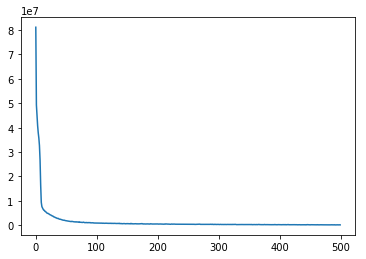

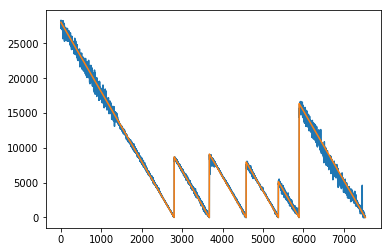

In [6]:
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)

## test modellen

##################
# Test: 1_3
##################
1802/1802 [==============================] - 0s 201us/step


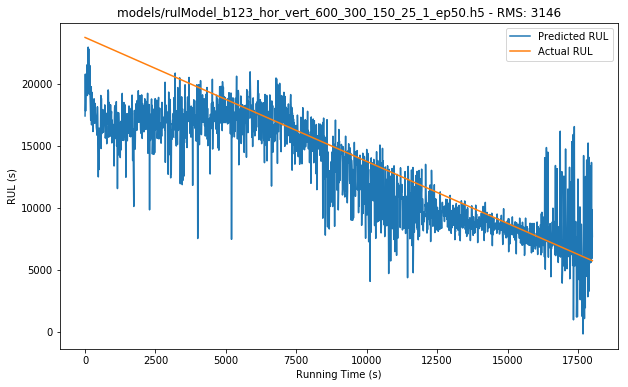

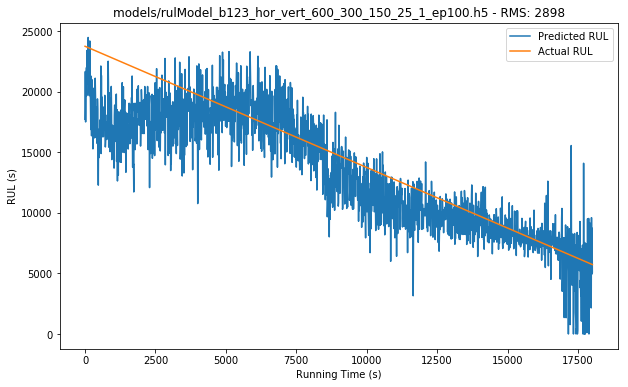

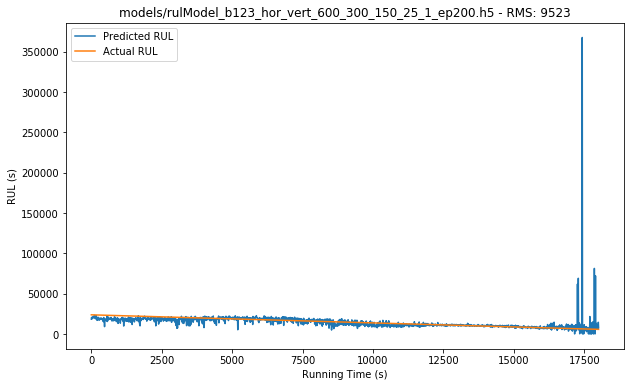

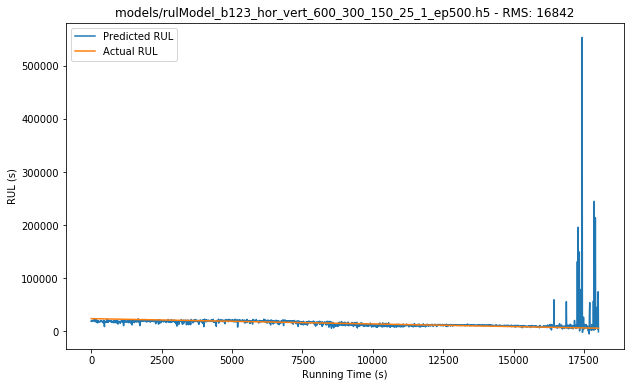

##################
# Test: 1_4
##################
1139/1139 [==============================] - 0s 299us/step


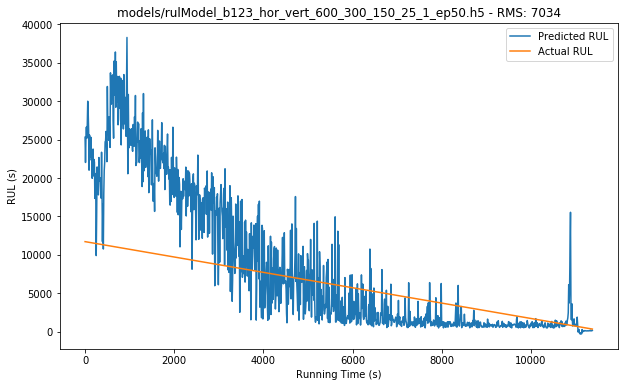

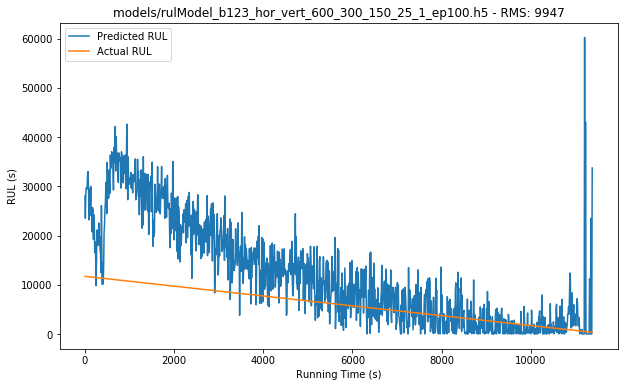

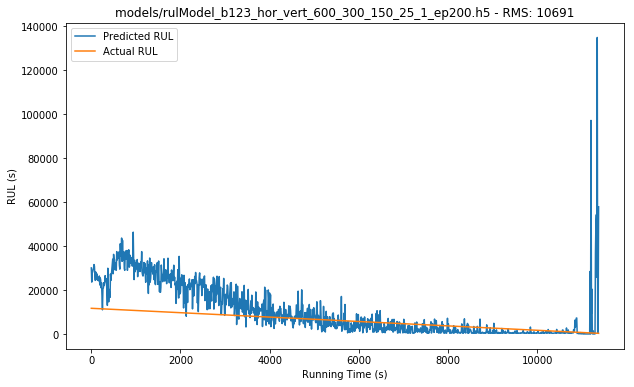

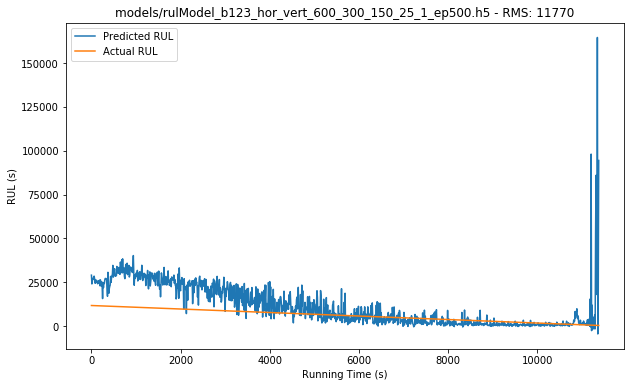

##################
# Test: 1_5
##################
2302/2302 [==============================] - 1s 245us/step


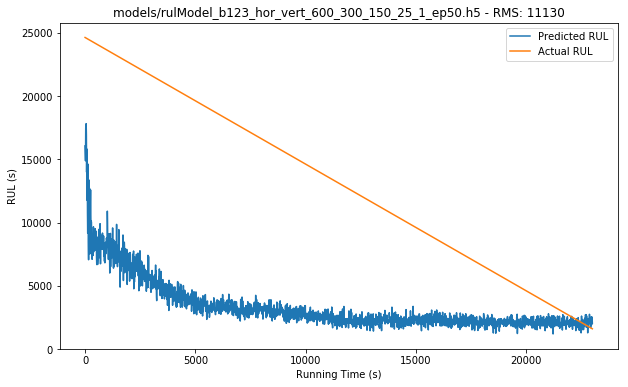

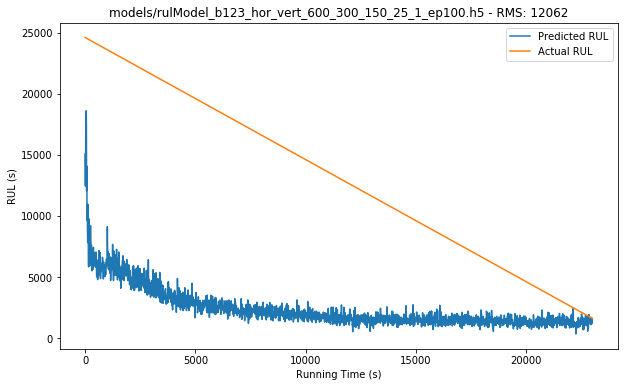

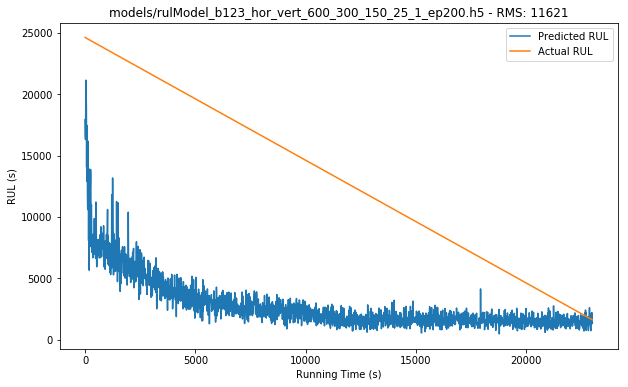

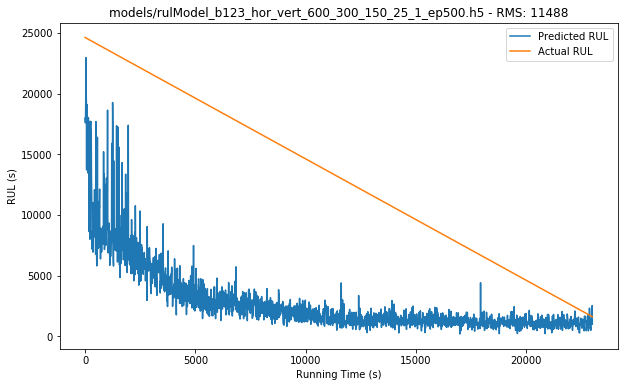

##################
# Test: 1_6
##################
2302/2302 [==============================] - 1s 268us/step


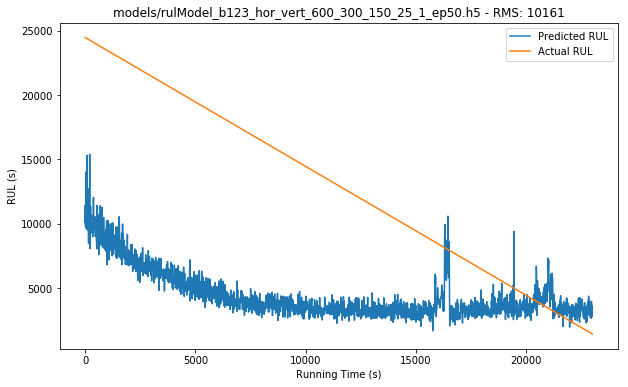

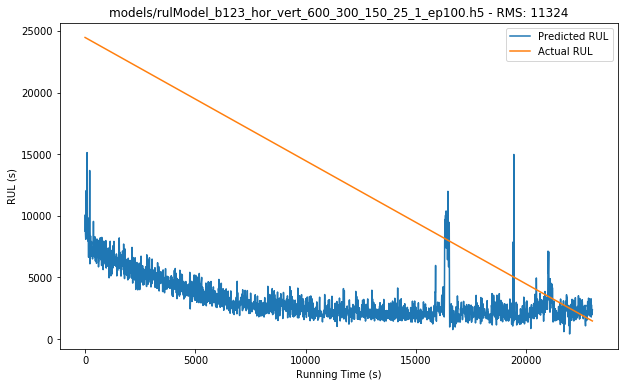

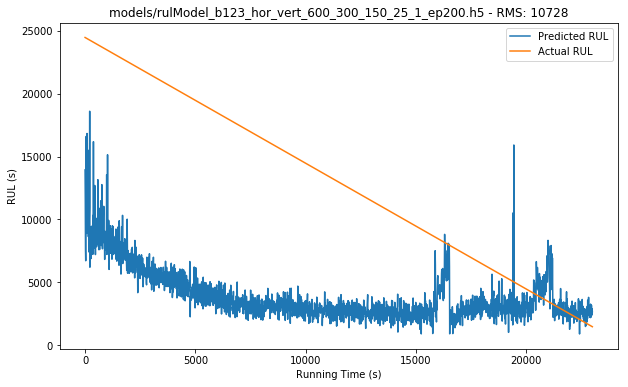

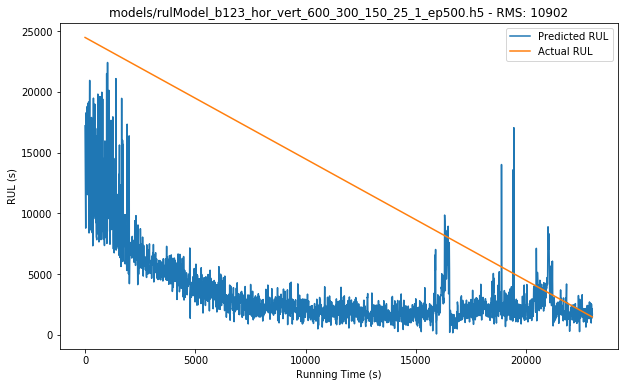

##################
# Test: 1_7
##################
1502/1502 [==============================] - 1s 391us/step


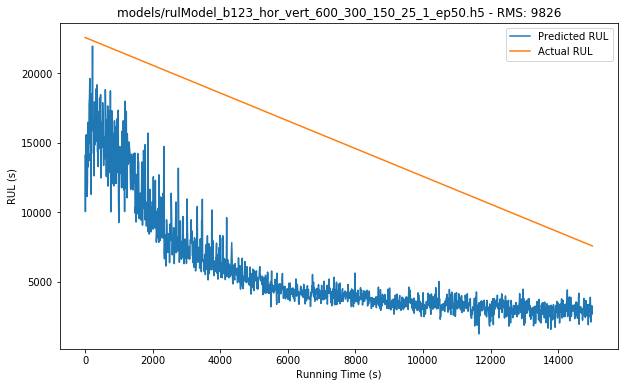

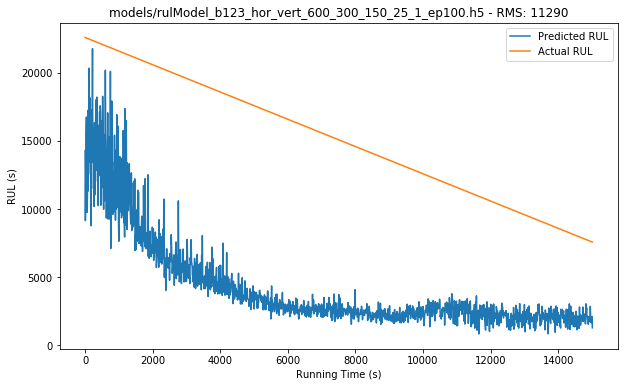

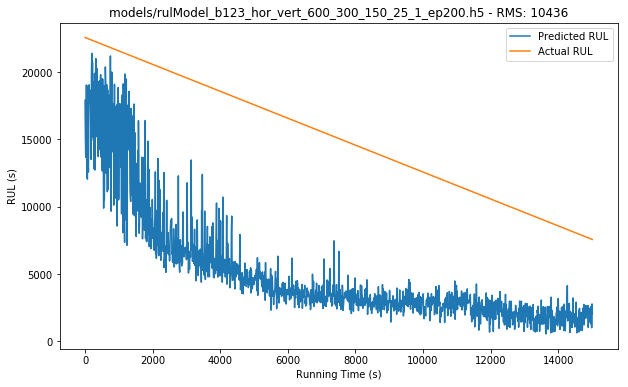

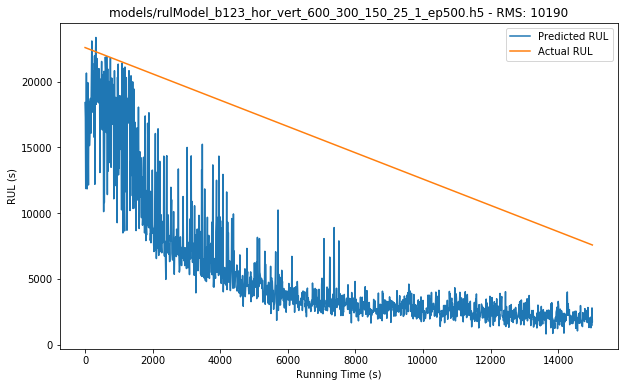

##################
# Test: 2_3
##################
1202/1202 [==============================] - 1s 570us/step


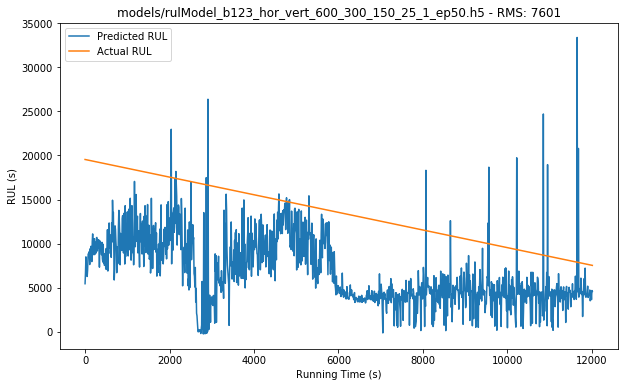

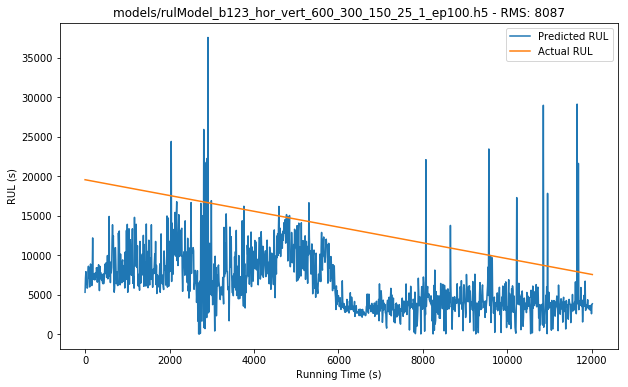

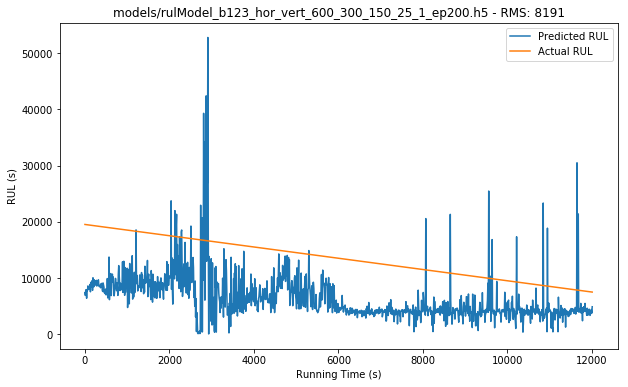

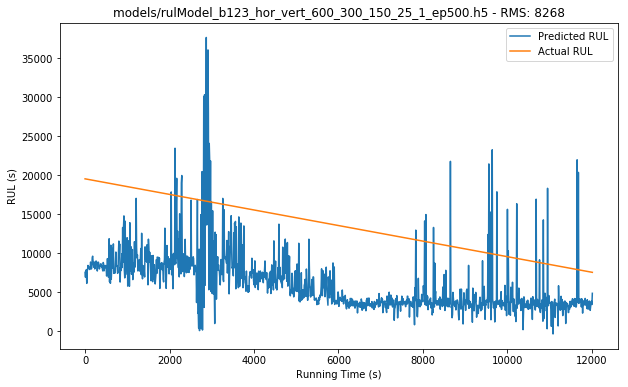

##################
# Test: 2_4
##################
612/612 [==============================] - 1s 1ms/step


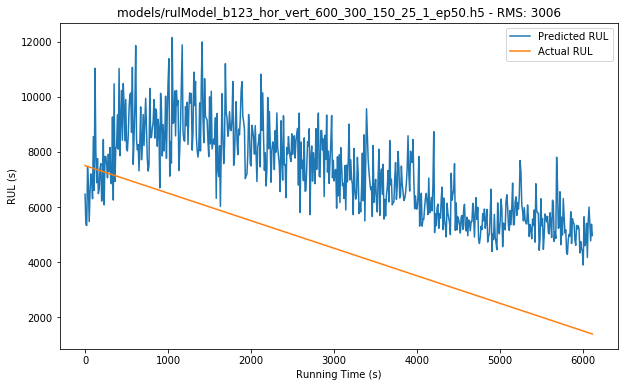

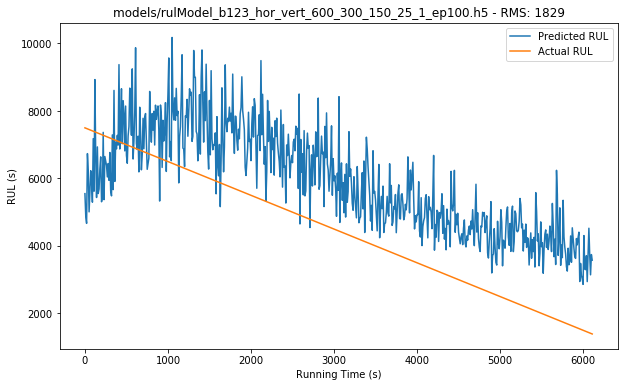

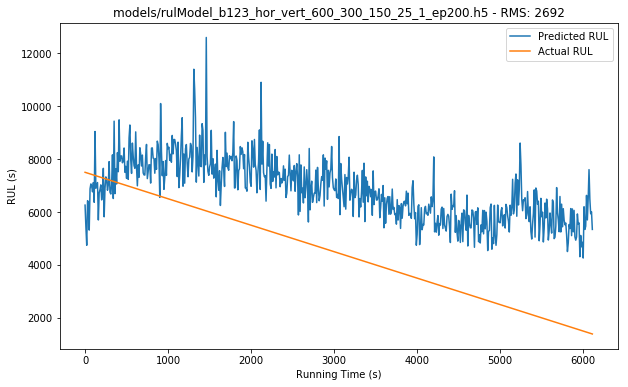

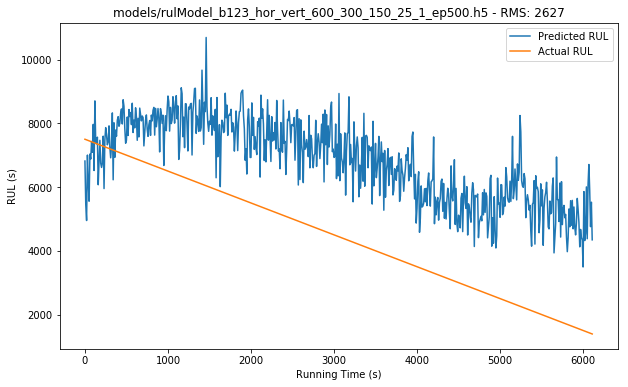

##################
# Test: 2_5
##################
2002/2002 [==============================] - 1s 470us/step


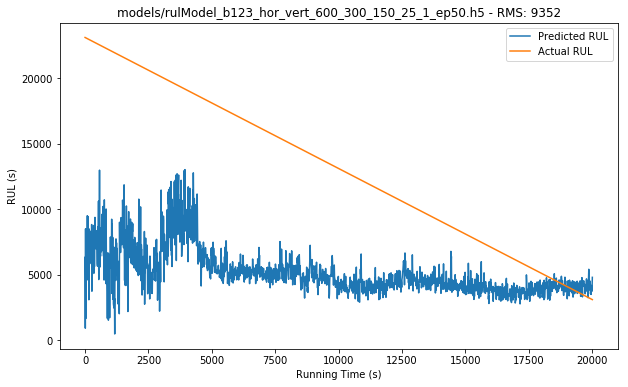

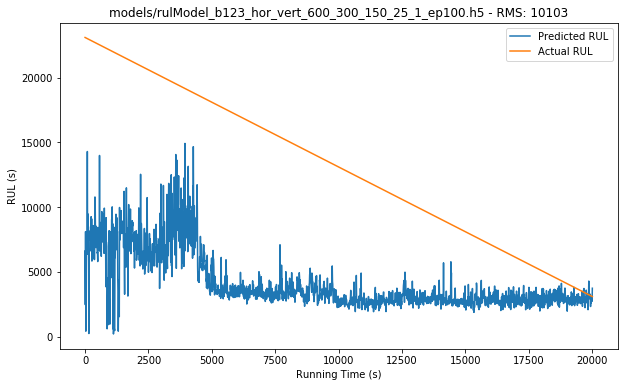

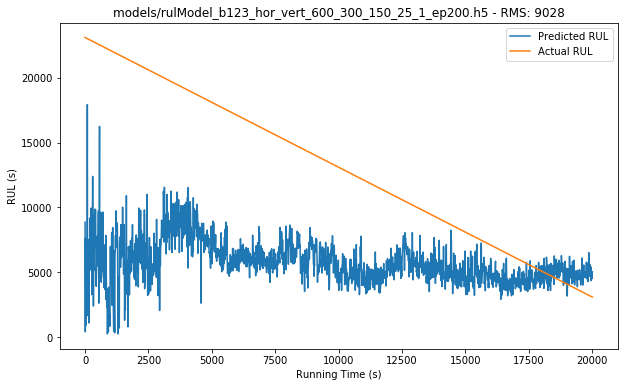

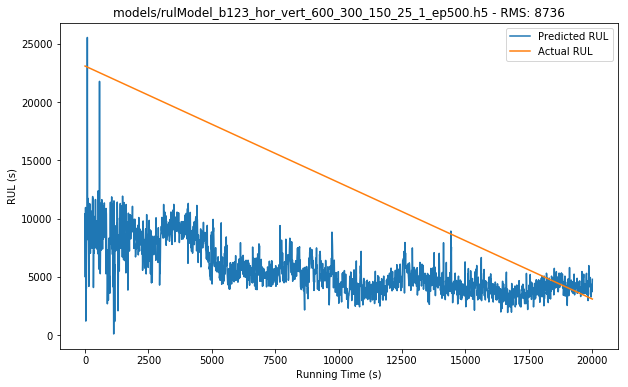

##################
# Test: 2_6
##################
572/572 [==============================] - 1s 1ms/step


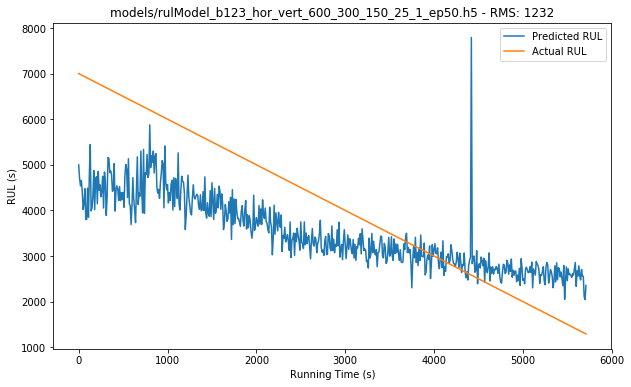

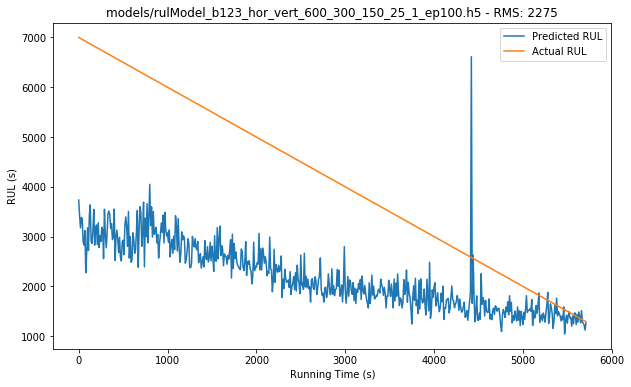

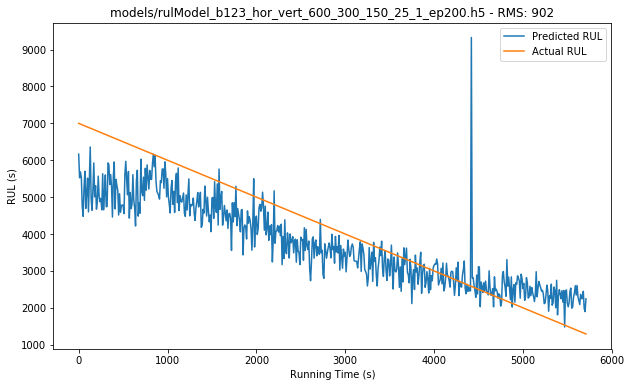

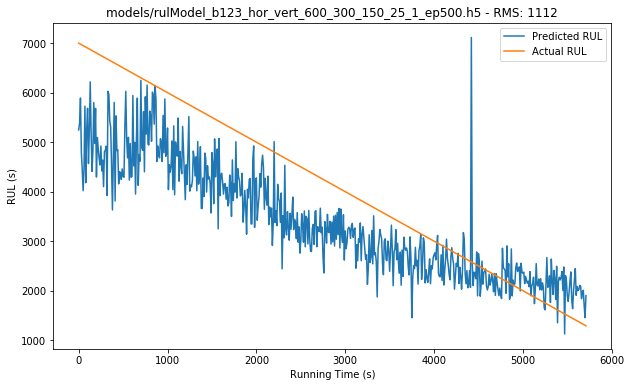

##################
# Test: 2_7
##################
172/172 [==============================] - 1s 6ms/step


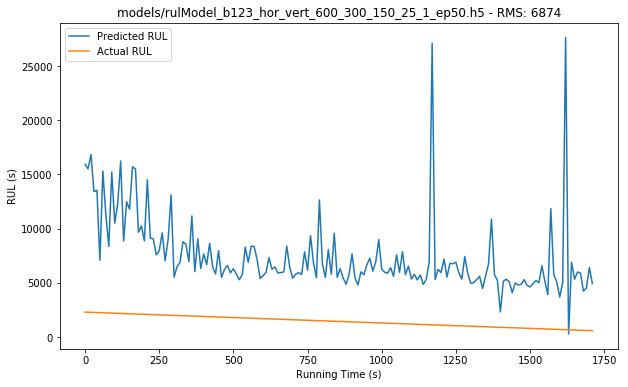

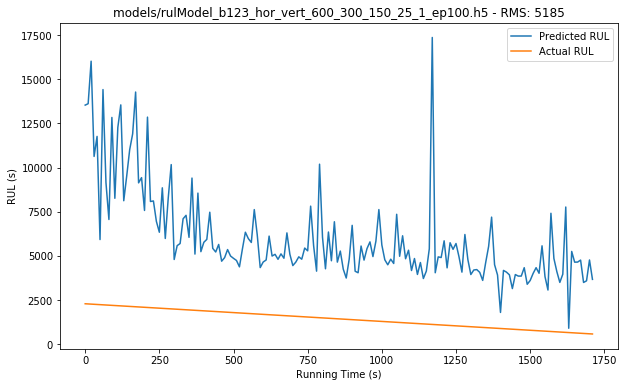

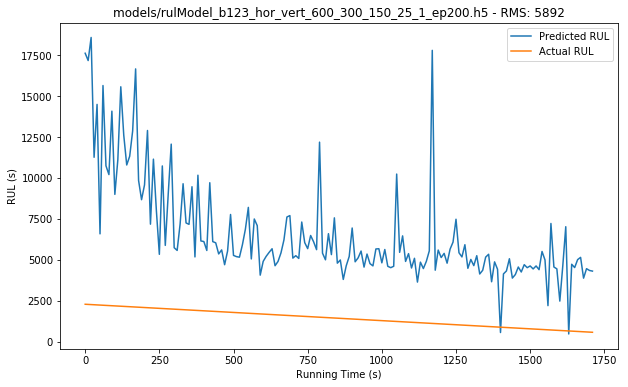

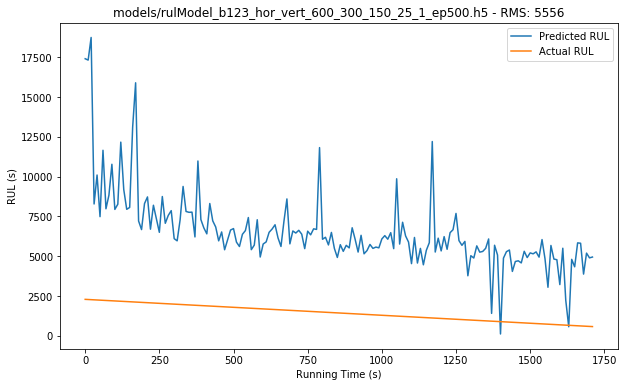

##################
# Test: 3_3
##################
352/352 [==============================] - 1s 3ms/step


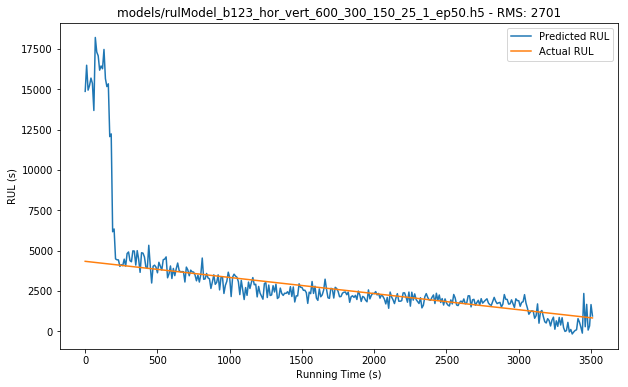

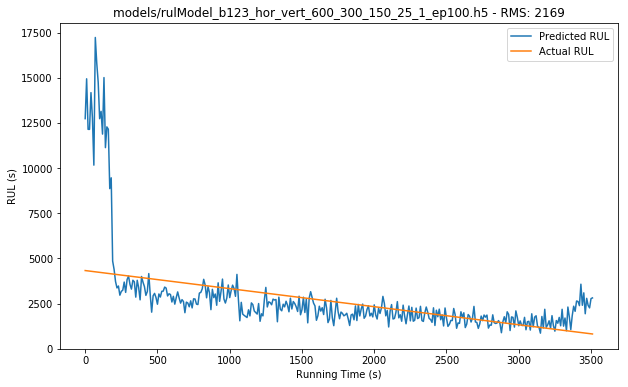

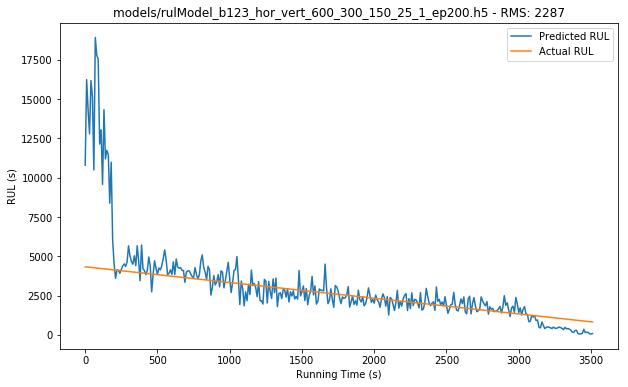

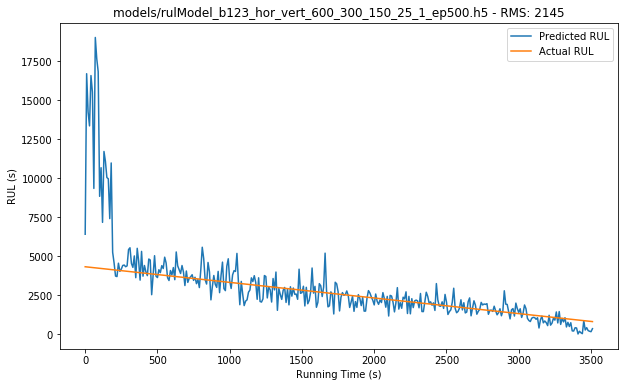

In [7]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)

# Train met andere layers

Epoch 1/50
7534/7534 [==============================] - 6s 783us/step - loss: 125529034.6907
Epoch 2/50
7534/7534 [==============================] - 3s 454us/step - loss: 120778443.1824
Epoch 3/50
7534/7534 [==============================] - 3s 455us/step - loss: 106077082.2543
Epoch 4/50
7534/7534 [==============================] - 3s 457us/step - loss: 84026241.8625
Epoch 5/50
7534/7534 [==============================] - 4s 487us/step - loss: 65039426.6844
Epoch 6/50
7534/7534 [==============================] - 4s 469us/step - loss: 55803073.5907
Epoch 7/50
7534/7534 [==============================] - 4s 491us/step - loss: 53139743.5073
Epoch 8/50
7534/7534 [==============================] - 3s 464us/step - loss: 52313494.1019
Epoch 9/50
7534/7534 [==============================] - 3s 456us/step - loss: 51770999.9405
Epoch 10/50
7534/7534 [==============================] - 3s 455us/step - loss: 51313495.4096
Epoch 11/50
7534/7534 [==============================] - 3s 462us/step - los

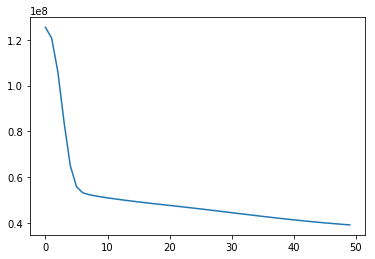

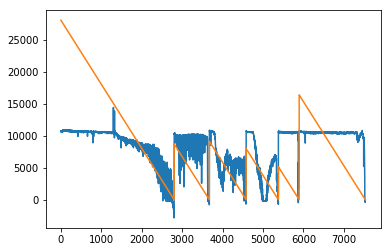

Epoch 1/100
7534/7534 [==============================] - 6s 810us/step - loss: 125131281.9793
Epoch 2/100
7534/7534 [==============================] - 4s 497us/step - loss: 115241298.7948
Epoch 3/100
7534/7534 [==============================] - 4s 465us/step - loss: 89330123.7101
Epoch 4/100
7534/7534 [==============================] - 3s 454us/step - loss: 63915561.7329
Epoch 5/100
7534/7534 [==============================] - 3s 447us/step - loss: 54257213.9028
Epoch 6/100
7534/7534 [==============================] - 3s 442us/step - loss: 52356960.6467
Epoch 7/100
7534/7534 [==============================] - 3s 447us/step - loss: 51599921.6671
Epoch 8/100
7534/7534 [==============================] - 3s 464us/step - loss: 50988026.0903
Epoch 9/100
7534/7534 [==============================] - 3s 446us/step - loss: 50446907.6676
Epoch 10/100
7534/7534 [==============================] - 3s 448us/step - loss: 49932084.1367
Epoch 11/100
7534/7534 [==============================] - 3s 447us/

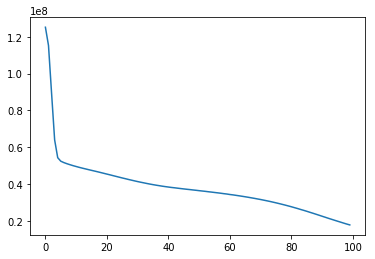

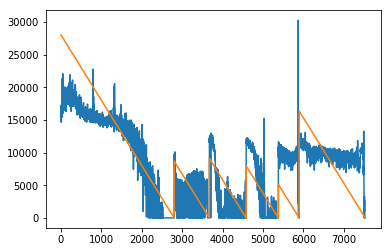

Epoch 1/200
7534/7534 [==============================] - 6s 841us/step - loss: 125233981.6151
Epoch 2/200
7534/7534 [==============================] - 4s 519us/step - loss: 116991049.0003
Epoch 3/200
7534/7534 [==============================] - 4s 483us/step - loss: 94525622.3308
Epoch 4/200
7534/7534 [==============================] - 4s 479us/step - loss: 69088402.2702
Epoch 5/200
7534/7534 [==============================] - 4s 473us/step - loss: 56124665.7744
Epoch 6/200
7534/7534 [==============================] - 4s 470us/step - loss: 52938689.4898
Epoch 7/200
7534/7534 [==============================] - 4s 471us/step - loss: 52026270.9636
Epoch 8/200
7534/7534 [==============================] - 4s 466us/step - loss: 51398180.2729
Epoch 9/200
7534/7534 [==============================] - 4s 471us/step - loss: 50853075.7887
Epoch 10/200
7534/7534 [==============================] - 4s 466us/step - loss: 50356946.2108
Epoch 11/200
7534/7534 [==============================] - 4s 469us/

7534/7534 [==============================] - 4s 468us/step - loss: 6431109.5696
Epoch 176/200
7534/7534 [==============================] - 4s 472us/step - loss: 6378093.1978
Epoch 177/200
7534/7534 [==============================] - 4s 470us/step - loss: 6338751.2467
Epoch 178/200
7534/7534 [==============================] - 4s 468us/step - loss: 6300572.2197
Epoch 179/200
7534/7534 [==============================] - 4s 471us/step - loss: 6254673.2799
Epoch 180/200
7534/7534 [==============================] - 4s 469us/step - loss: 6206802.3691
Epoch 181/200
7534/7534 [==============================] - 4s 468us/step - loss: 6168954.0840
Epoch 182/200
7534/7534 [==============================] - 4s 468us/step - loss: 6137391.5271
Epoch 183/200
7534/7534 [==============================] - 4s 471us/step - loss: 6099876.3973
Epoch 184/200
7534/7534 [==============================] - 4s 471us/step - loss: 6058108.2152
Epoch 185/200
7534/7534 [==============================] - 4s 467us/step -

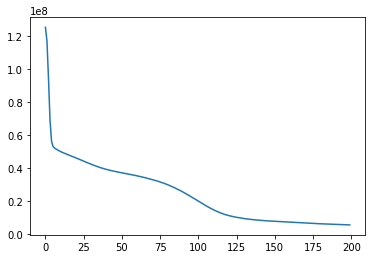

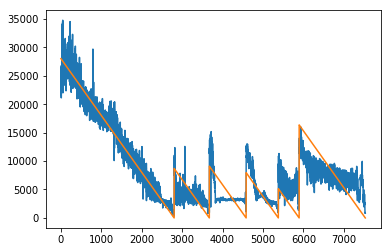

Epoch 1/500
7534/7534 [==============================] - 6s 835us/step - loss: 125163455.4861
Epoch 2/500
7534/7534 [==============================] - 4s 467us/step - loss: 116558809.6756
Epoch 3/500
7534/7534 [==============================] - 3s 459us/step - loss: 93636561.1733
Epoch 4/500
7534/7534 [==============================] - 3s 455us/step - loss: 68325156.5810
Epoch 5/500
7534/7534 [==============================] - 3s 455us/step - loss: 55797310.7449
Epoch 6/500
7534/7534 [==============================] - 3s 456us/step - loss: 52779739.0146
Epoch 7/500
7534/7534 [==============================] - 3s 450us/step - loss: 51861621.0703
Epoch 8/500
7534/7534 [==============================] - 3s 460us/step - loss: 51229755.6560
Epoch 9/500
7534/7534 [==============================] - 3s 451us/step - loss: 50694237.0109
Epoch 10/500
7534/7534 [==============================] - 3s 456us/step - loss: 50206620.8569
Epoch 11/500
7534/7534 [==============================] - 3s 457us/

7534/7534 [==============================] - 3s 456us/step - loss: 5450780.2363
Epoch 176/500
7534/7534 [==============================] - 3s 459us/step - loss: 5430469.2746
Epoch 177/500
7534/7534 [==============================] - 3s 458us/step - loss: 5394447.4821
Epoch 178/500
7534/7534 [==============================] - 3s 457us/step - loss: 5364217.5346
Epoch 179/500
7534/7534 [==============================] - 3s 460us/step - loss: 5328790.0407
Epoch 180/500
7534/7534 [==============================] - 3s 462us/step - loss: 5312902.4429
Epoch 181/500
7534/7534 [==============================] - 3s 455us/step - loss: 5285322.0267
Epoch 182/500
7534/7534 [==============================] - 3s 461us/step - loss: 5251502.4217
Epoch 183/500
7534/7534 [==============================] - 3s 454us/step - loss: 5226221.6870
Epoch 184/500
7534/7534 [==============================] - 3s 456us/step - loss: 5187266.7653
Epoch 185/500
7534/7534 [==============================] - 3s 459us/step -

7534/7534 [==============================] - 3s 456us/step - loss: 2528842.9721
Epoch 350/500
7534/7534 [==============================] - 3s 456us/step - loss: 2522017.1638
Epoch 351/500
7534/7534 [==============================] - 3s 455us/step - loss: 2510775.4869
Epoch 352/500
7534/7534 [==============================] - 3s 457us/step - loss: 2497327.9266
Epoch 353/500
7534/7534 [==============================] - 3s 458us/step - loss: 2494366.4818
Epoch 354/500
7534/7534 [==============================] - 3s 456us/step - loss: 2485222.2132
Epoch 355/500
7534/7534 [==============================] - 3s 457us/step - loss: 2482934.3137
Epoch 356/500
7534/7534 [==============================] - 3s 457us/step - loss: 2479237.9951
Epoch 357/500
7534/7534 [==============================] - 3s 455us/step - loss: 2454857.1466
Epoch 358/500
7534/7534 [==============================] - 3s 456us/step - loss: 2439711.1807
Epoch 359/500
7534/7534 [==============================] - 3s 461us/step -

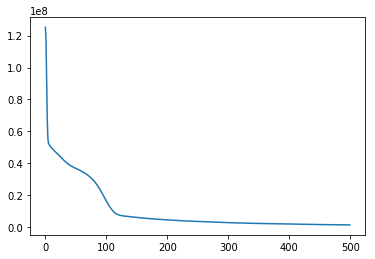

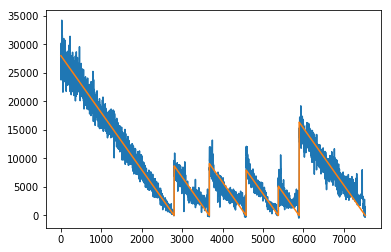

In [8]:
layersizes = [300,25]
epochss = [50, 100, 200, 500]
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)

##################
# Test: 1_3
##################
1802/1802 [==============================] - 1s 680us/step


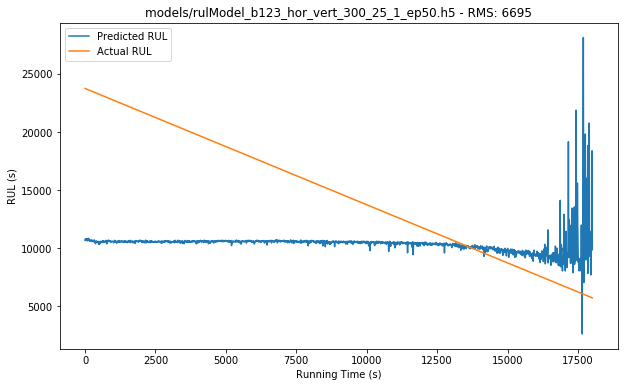

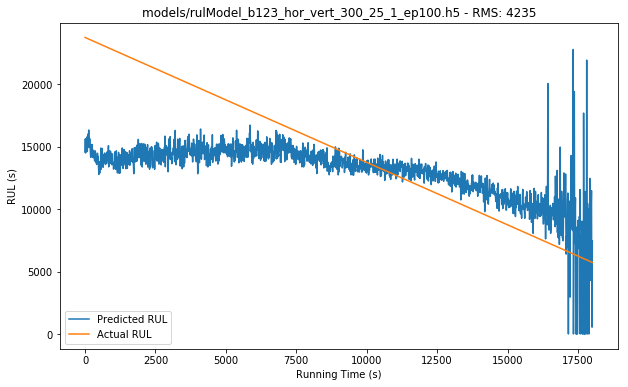

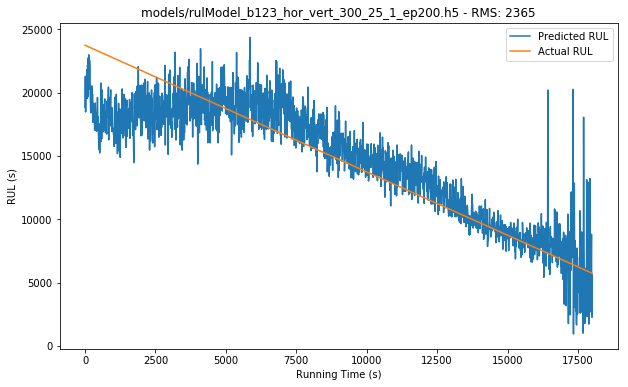

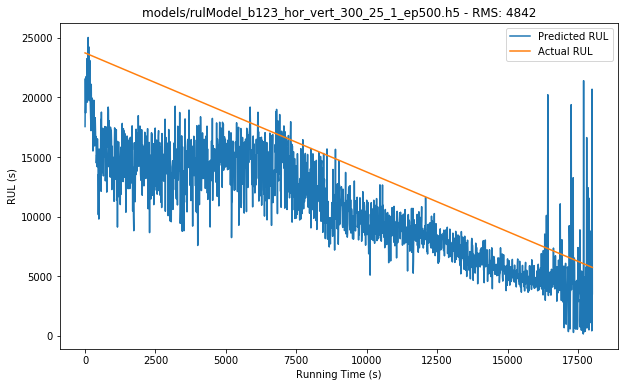

##################
# Test: 1_4
##################
1139/1139 [==============================] - 1s 1ms/step


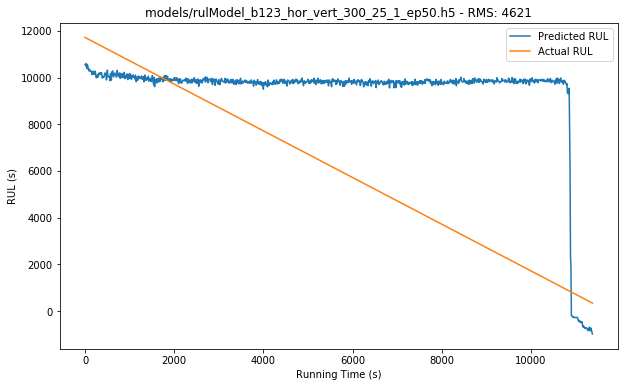

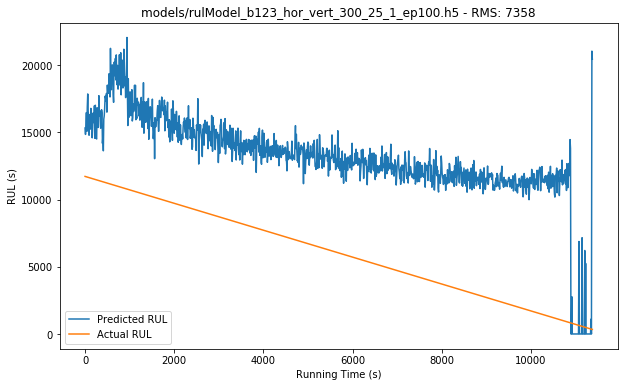

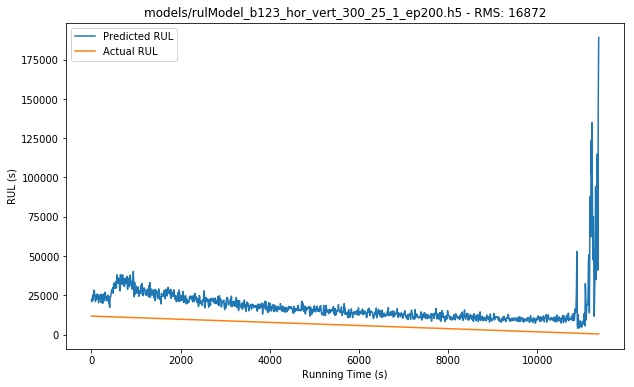

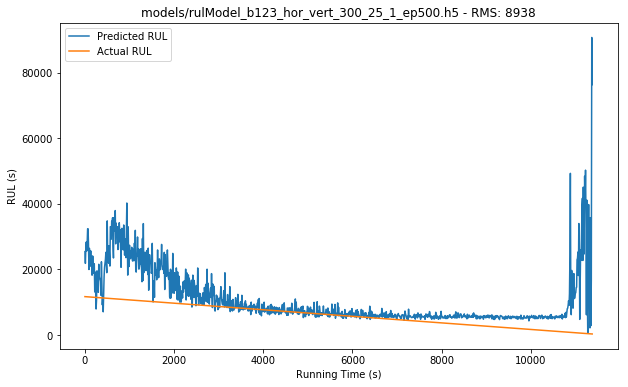

##################
# Test: 1_5
##################
2302/2302 [==============================] - 1s 618us/step


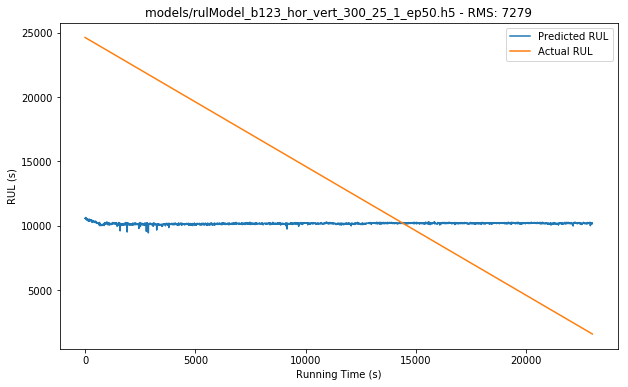

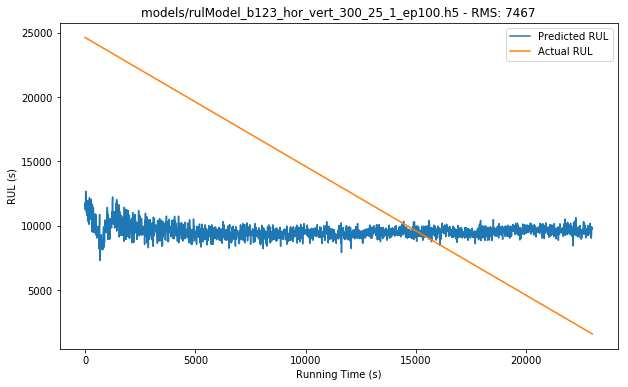

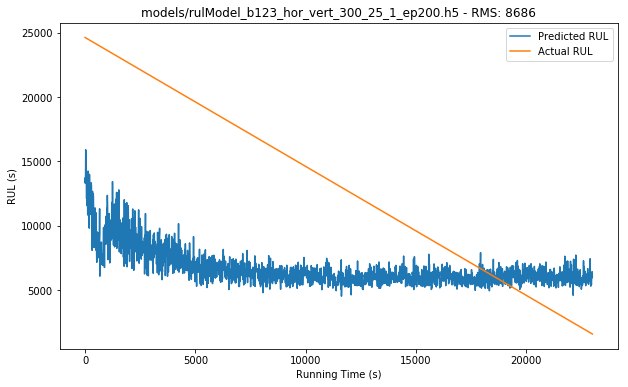

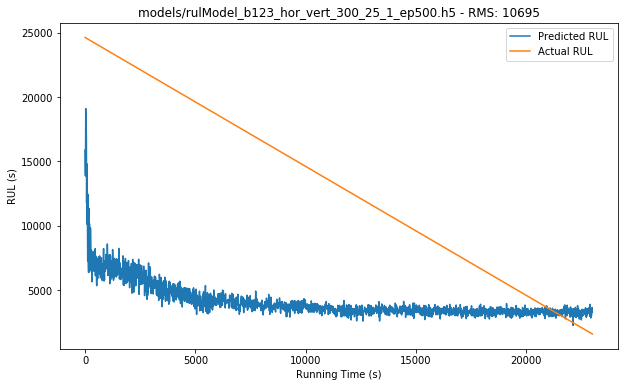

##################
# Test: 1_6
##################
2302/2302 [==============================] - 2s 688us/step


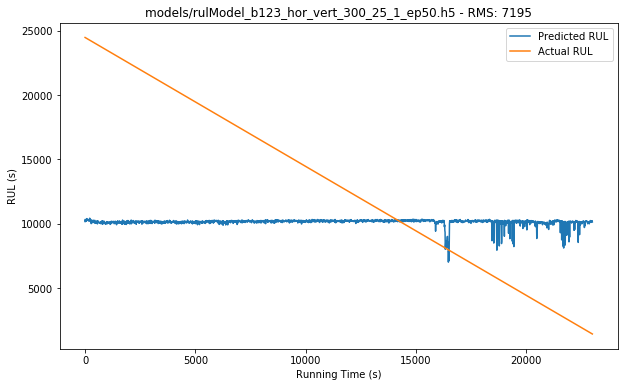

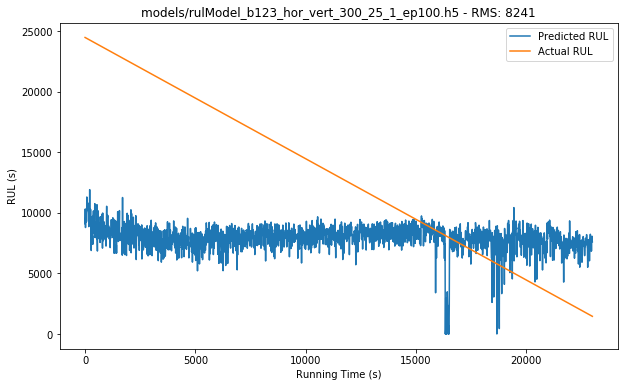

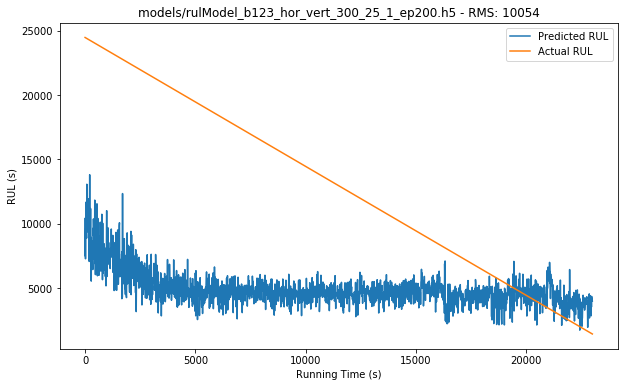

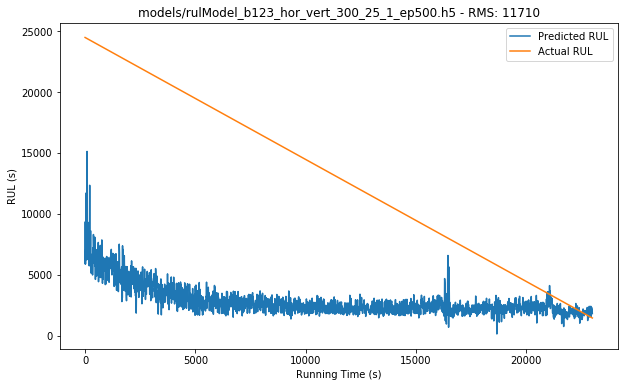

##################
# Test: 1_7
##################
1502/1502 [==============================] - 1s 988us/step


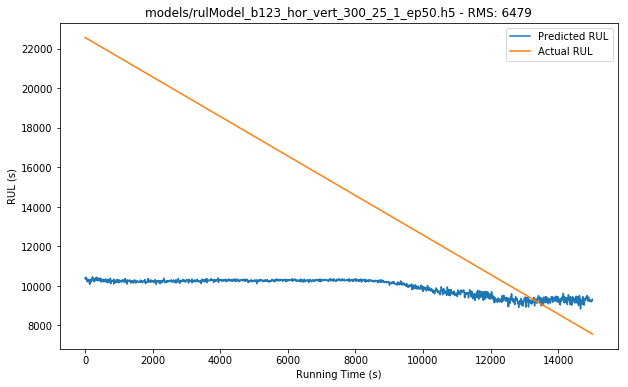

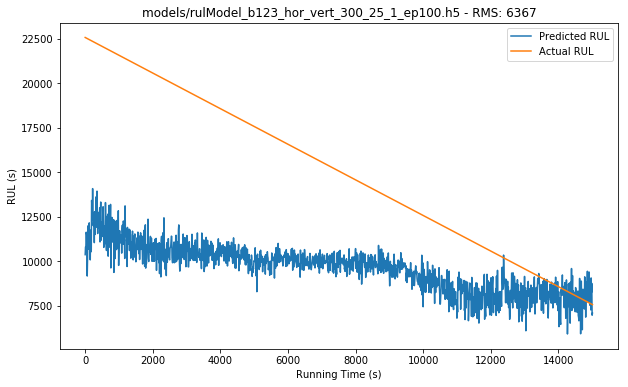

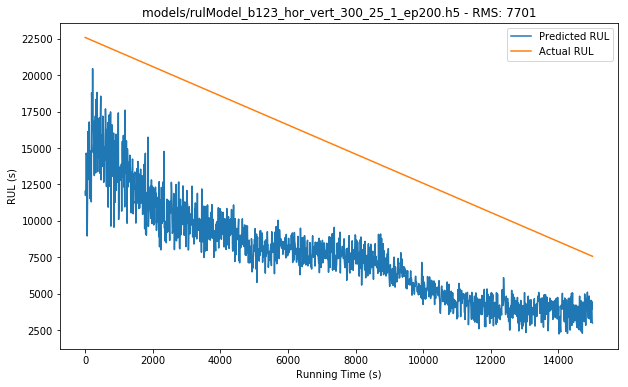

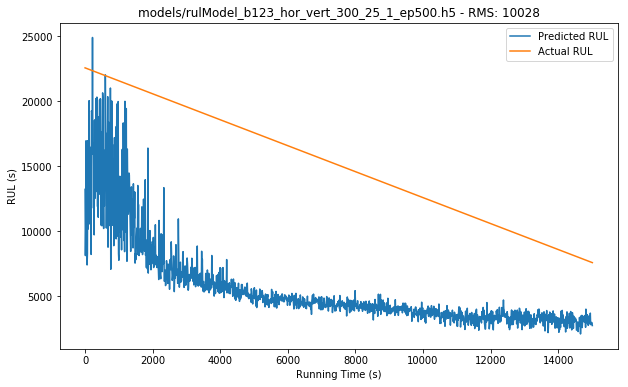

##################
# Test: 2_3
##################
1202/1202 [==============================] - 1s 1ms/step


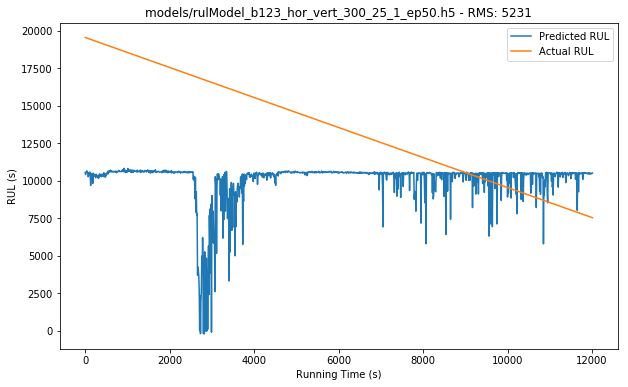

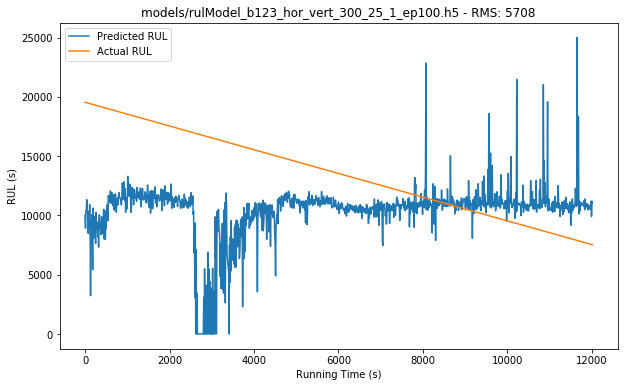

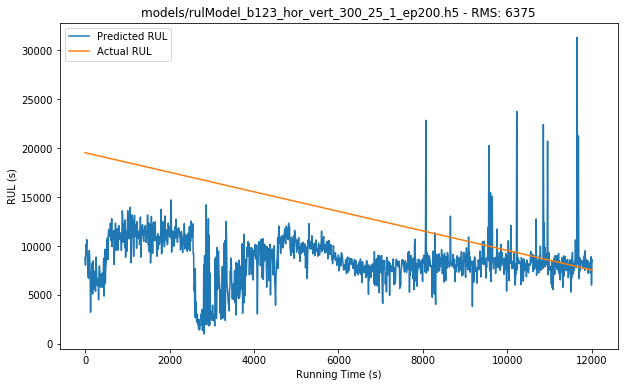

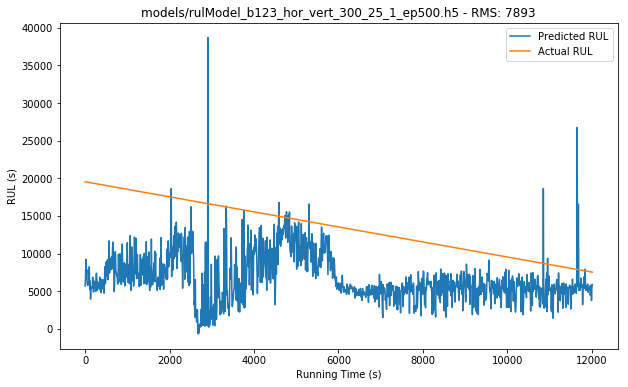

##################
# Test: 2_4
##################
612/612 [==============================] - 1s 2ms/step


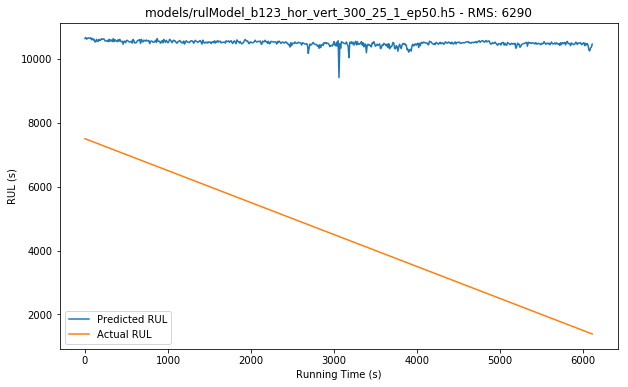

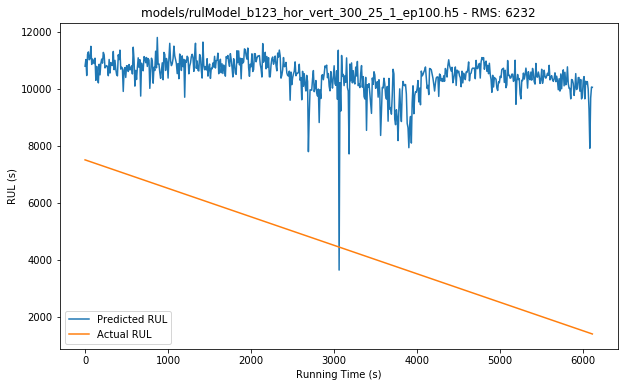

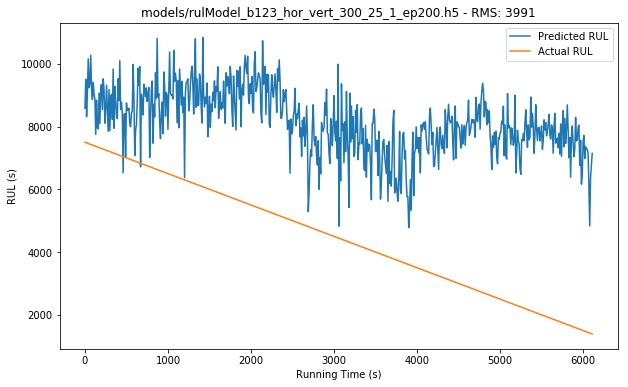

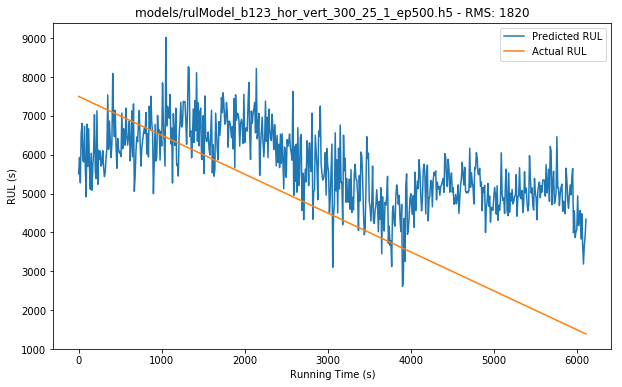

##################
# Test: 2_5
##################
2002/2002 [==============================] - 2s 876us/step


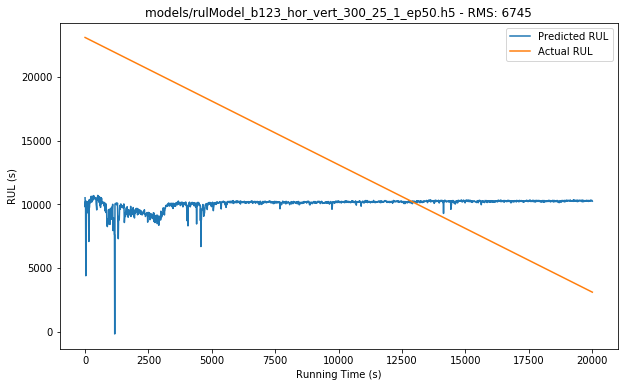

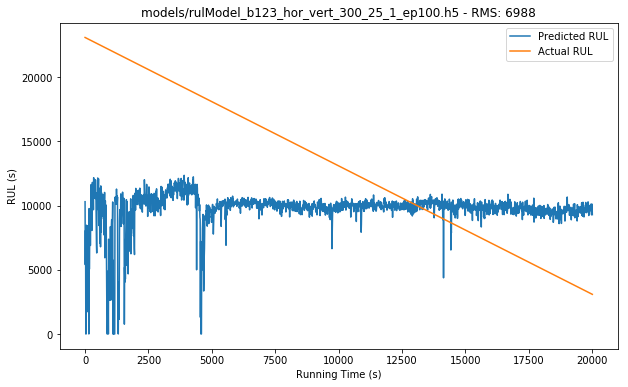

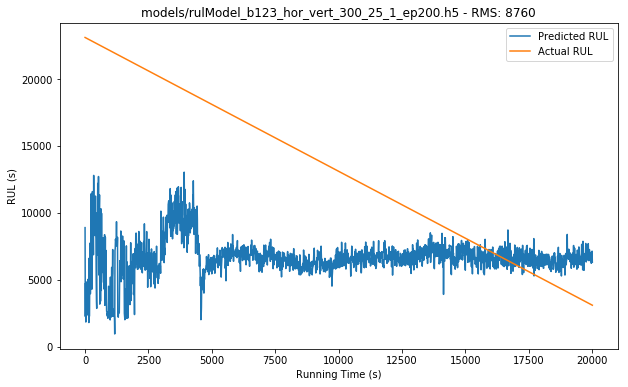

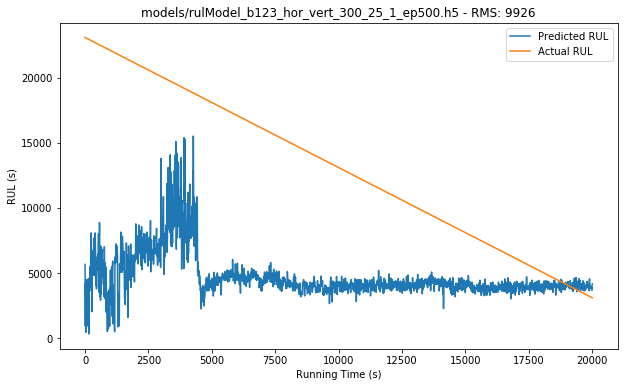

##################
# Test: 2_6
##################
572/572 [==============================] - 2s 3ms/step


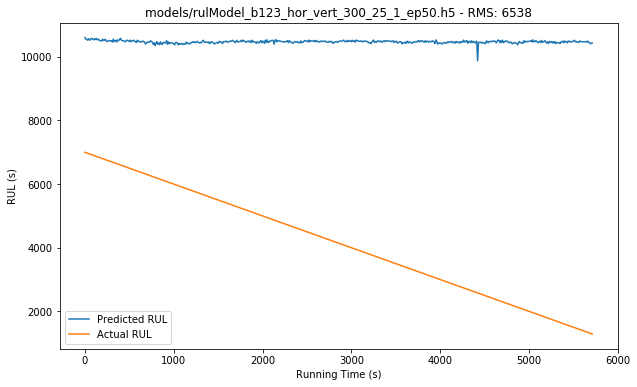

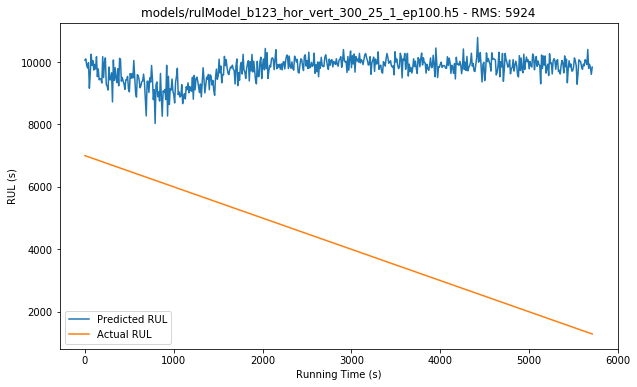

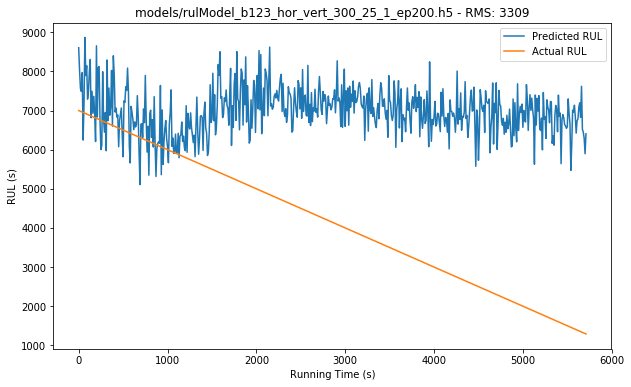

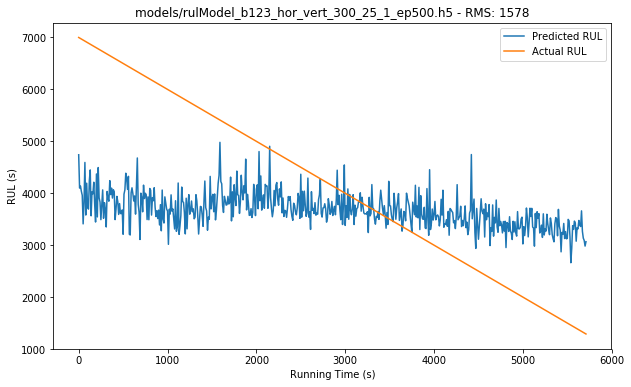

##################
# Test: 2_7
##################
172/172 [==============================] - 2s 10ms/step


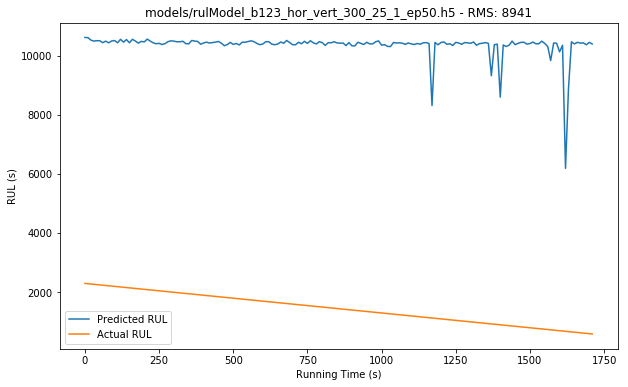

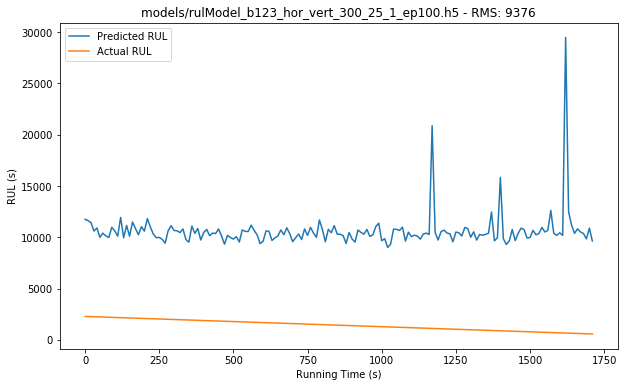

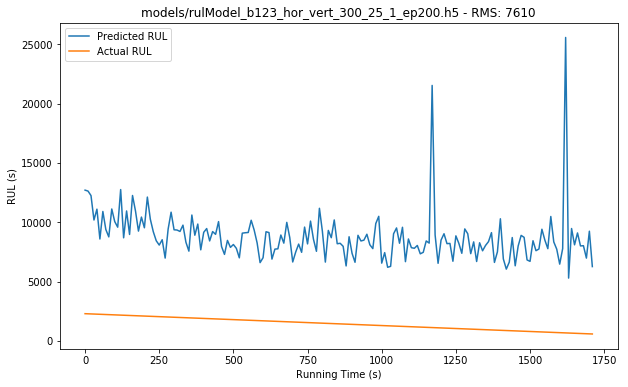

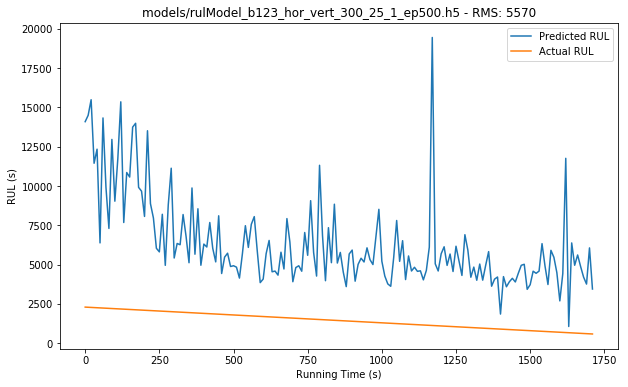

##################
# Test: 3_3
##################
352/352 [==============================] - 2s 5ms/step


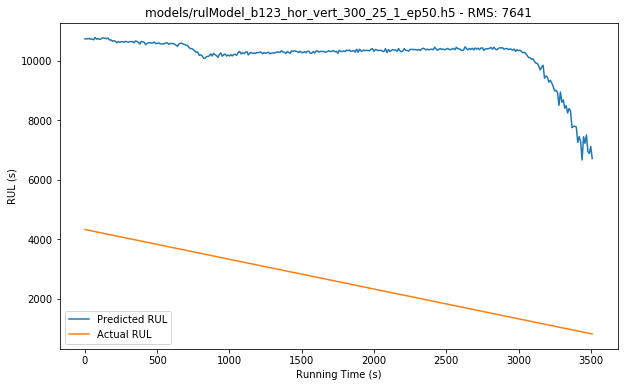

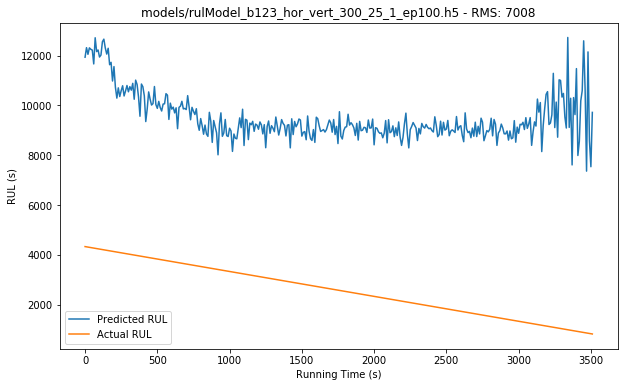

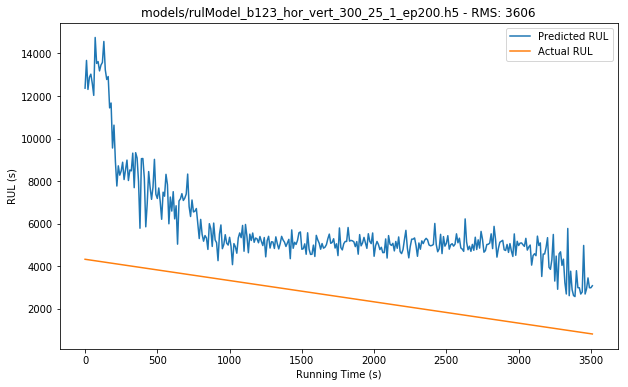

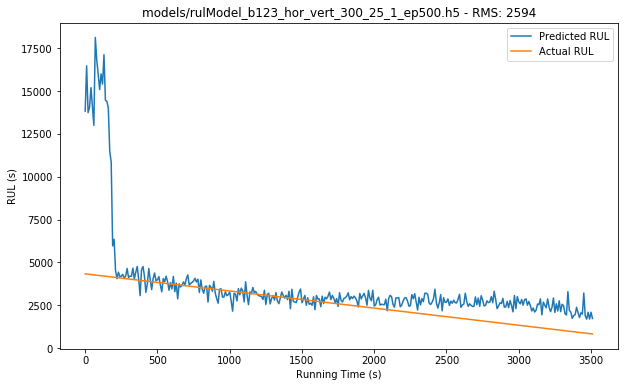

In [9]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)

Epoch 1/50
7534/7534 [==============================] - 22s 3ms/step - loss: 58364830.9371
Epoch 2/50
7534/7534 [==============================] - 19s 3ms/step - loss: 28288874.6331
Epoch 3/50
7534/7534 [==============================] - 18s 2ms/step - loss: 8842761.1840
Epoch 4/50
7534/7534 [==============================] - 17s 2ms/step - loss: 5870607.3628
Epoch 5/50
7534/7534 [==============================] - 17s 2ms/step - loss: 4390366.0741
Epoch 6/50
7534/7534 [==============================] - 17s 2ms/step - loss: 4239117.6958
Epoch 7/50
7534/7534 [==============================] - 19s 2ms/step - loss: 3296287.0715
Epoch 8/50
7534/7534 [==============================] - 20s 3ms/step - loss: 2924337.6724
Epoch 9/50
7534/7534 [==============================] - 18s 2ms/step - loss: 2562072.6543
Epoch 10/50
7534/7534 [==============================] - 17s 2ms/step - loss: 2474040.1374
Epoch 11/50
7534/7534 [==============================] - 18s 2ms/step - loss: 2410375.3703
Epoch 

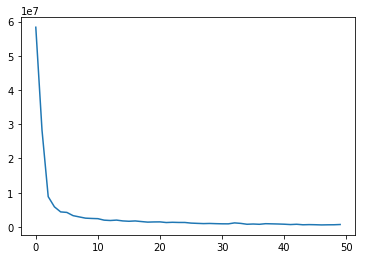

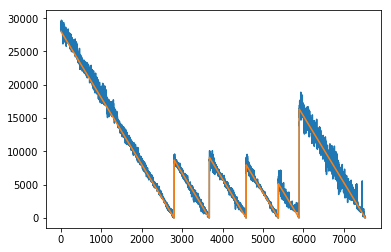

Epoch 1/100
7534/7534 [==============================] - 22s 3ms/step - loss: 58257565.2556
Epoch 2/100
7534/7534 [==============================] - 18s 2ms/step - loss: 33993942.5458
Epoch 3/100
7534/7534 [==============================] - 17s 2ms/step - loss: 8741138.8411
Epoch 4/100
7534/7534 [==============================] - 17s 2ms/step - loss: 6148775.3600
Epoch 5/100
7534/7534 [==============================] - 18s 2ms/step - loss: 5051694.7197
Epoch 6/100
7534/7534 [==============================] - 17s 2ms/step - loss: 4094806.2273
Epoch 7/100
7534/7534 [==============================] - 17s 2ms/step - loss: 3972501.4882
Epoch 8/100
7534/7534 [==============================] - 17s 2ms/step - loss: 3300457.9343
Epoch 9/100
7534/7534 [==============================] - 18s 2ms/step - loss: 3086633.4277
Epoch 10/100
7534/7534 [==============================] - 17s 2ms/step - loss: 2906296.4477
Epoch 11/100
7534/7534 [==============================] - 17s 2ms/step - loss: 2357000.

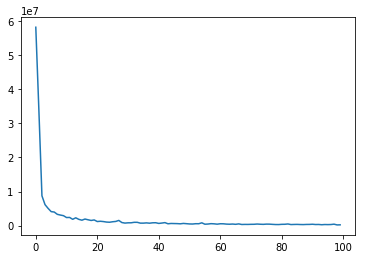

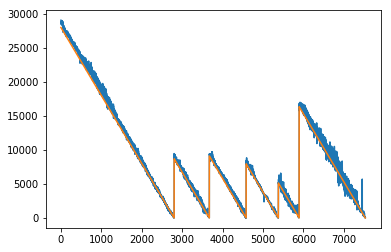

Epoch 1/200
7534/7534 [==============================] - 23s 3ms/step - loss: 57615311.4266
Epoch 2/200
7534/7534 [==============================] - 17s 2ms/step - loss: 33353252.5384
Epoch 3/200
7534/7534 [==============================] - 18s 2ms/step - loss: 9041245.3786
Epoch 4/200
7534/7534 [==============================] - 18s 2ms/step - loss: 6791249.4612
Epoch 5/200
7534/7534 [==============================] - 17s 2ms/step - loss: 5291144.4399
Epoch 6/200
7534/7534 [==============================] - 18s 2ms/step - loss: 4807573.4334
Epoch 7/200
7534/7534 [==============================] - 18s 2ms/step - loss: 3800002.7057
Epoch 8/200
7534/7534 [==============================] - 18s 2ms/step - loss: 2973058.9009
Epoch 9/200
7534/7534 [==============================] - 18s 2ms/step - loss: 2696558.7110
Epoch 10/200
7534/7534 [==============================] - 18s 2ms/step - loss: 2506883.5765
Epoch 11/200
7534/7534 [==============================] - 18s 2ms/step - loss: 2339761.

7534/7534 [==============================] - 18s 2ms/step - loss: 196284.4464
Epoch 180/200
7534/7534 [==============================] - 18s 2ms/step - loss: 191969.9451
Epoch 181/200
7534/7534 [==============================] - 18s 2ms/step - loss: 122133.6834
Epoch 182/200
7534/7534 [==============================] - 19s 3ms/step - loss: 124606.0848
Epoch 183/200
7534/7534 [==============================] - 18s 2ms/step - loss: 102033.2471
Epoch 184/200
7534/7534 [==============================] - 17s 2ms/step - loss: 146736.2370
Epoch 185/200
7534/7534 [==============================] - 17s 2ms/step - loss: 122505.1657
Epoch 186/200
7534/7534 [==============================] - 17s 2ms/step - loss: 190927.9897
Epoch 187/200
7534/7534 [==============================] - 18s 2ms/step - loss: 220862.5496
Epoch 188/200
7534/7534 [==============================] - 18s 2ms/step - loss: 126736.1965
Epoch 189/200
7534/7534 [==============================] - 18s 2ms/step - loss: 103205.8681
Ep

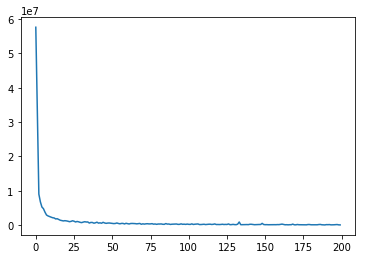

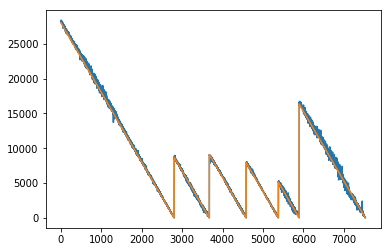

Epoch 1/500
7534/7534 [==============================] - 23s 3ms/step - loss: 60472480.5745
Epoch 2/500
7534/7534 [==============================] - 18s 2ms/step - loss: 38501898.8277
Epoch 3/500
7534/7534 [==============================] - 17s 2ms/step - loss: 15249534.9623
Epoch 4/500
7534/7534 [==============================] - 17s 2ms/step - loss: 6660842.1399
Epoch 5/500
7534/7534 [==============================] - 17s 2ms/step - loss: 5070671.6268
Epoch 6/500
7534/7534 [==============================] - 17s 2ms/step - loss: 3992093.3046
Epoch 7/500
7534/7534 [==============================] - 17s 2ms/step - loss: 3458677.0782
Epoch 8/500
7534/7534 [==============================] - 17s 2ms/step - loss: 2829851.0723
Epoch 9/500
7534/7534 [==============================] - 18s 2ms/step - loss: 2836492.2743
Epoch 10/500
7534/7534 [==============================] - 17s 2ms/step - loss: 2333351.6144
Epoch 11/500
7534/7534 [==============================] - 17s 2ms/step - loss: 2150468

7534/7534 [==============================] - 17s 2ms/step - loss: 188164.3239
Epoch 185/500
7534/7534 [==============================] - 17s 2ms/step - loss: 181975.0451
Epoch 186/500
7534/7534 [==============================] - 17s 2ms/step - loss: 142916.8712
Epoch 187/500
7534/7534 [==============================] - 17s 2ms/step - loss: 132015.9316
Epoch 188/500
7534/7534 [==============================] - 17s 2ms/step - loss: 129941.3128
Epoch 189/500
7534/7534 [==============================] - 17s 2ms/step - loss: 116345.4683
Epoch 190/500
7534/7534 [==============================] - 17s 2ms/step - loss: 191036.1498
Epoch 191/500
7534/7534 [==============================] - 17s 2ms/step - loss: 151515.9282
Epoch 192/500
7534/7534 [==============================] - 17s 2ms/step - loss: 134396.1047
Epoch 193/500
7534/7534 [==============================] - 17s 2ms/step - loss: 131318.8668
Epoch 194/500
7534/7534 [==============================] - 17s 2ms/step - loss: 303239.1254
Ep

Epoch 363/500
7534/7534 [==============================] - 17s 2ms/step - loss: 359366.1270
Epoch 364/500
7534/7534 [==============================] - 17s 2ms/step - loss: 84481.4775
Epoch 365/500
7534/7534 [==============================] - 17s 2ms/step - loss: 60326.5924
Epoch 366/500
7534/7534 [==============================] - 17s 2ms/step - loss: 40398.9961
Epoch 367/500
7534/7534 [==============================] - 17s 2ms/step - loss: 50454.3673
Epoch 368/500
7534/7534 [==============================] - 17s 2ms/step - loss: 63772.9323
Epoch 369/500
7534/7534 [==============================] - 17s 2ms/step - loss: 73225.3910
Epoch 370/500
7534/7534 [==============================] - 17s 2ms/step - loss: 51721.8017
Epoch 371/500
7534/7534 [==============================] - 17s 2ms/step - loss: 63813.3262
Epoch 372/500
7534/7534 [==============================] - 17s 2ms/step - loss: 89358.9965
Epoch 373/500
7534/7534 [==============================] - 17s 2ms/step - loss: 272175.66

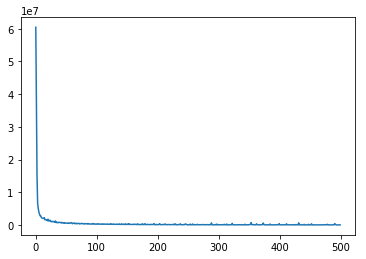

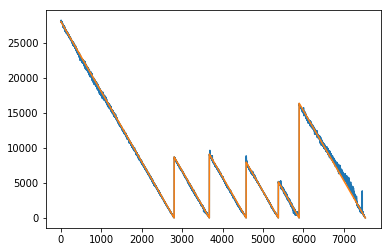

In [10]:
layersizes = [1000, 900,600,300,150,25]
epochss = [50, 100, 200, 500]
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)

##################
# Test: 1_3
##################
1802/1802 [==============================] - 3s 1ms/step


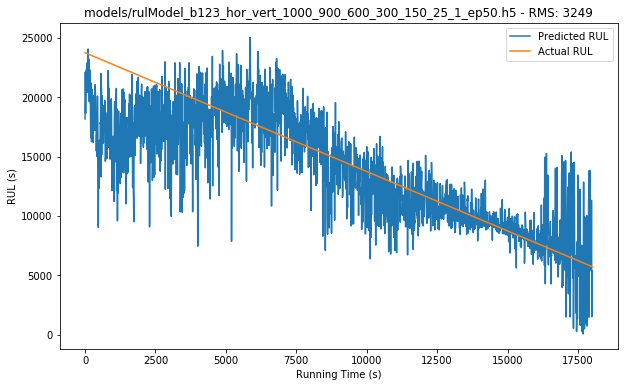

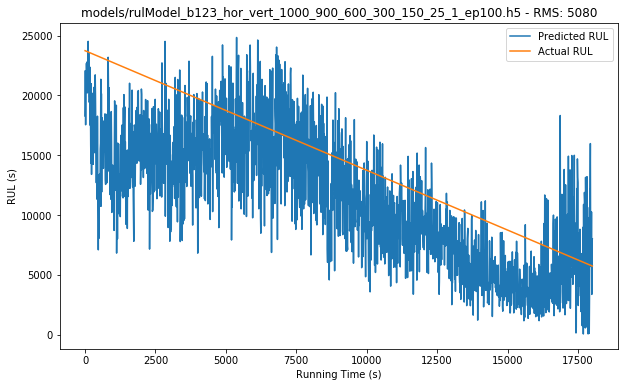

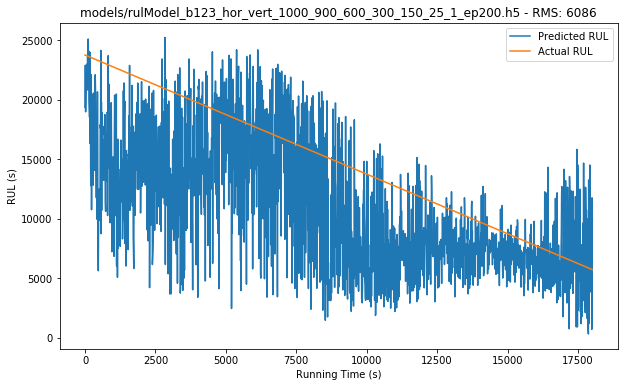

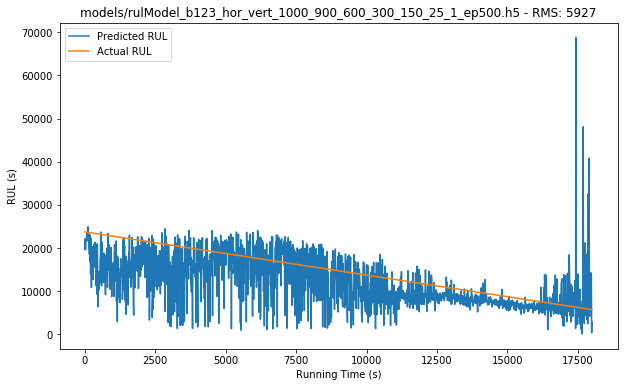

##################
# Test: 1_4
##################
1139/1139 [==============================] - 3s 2ms/step


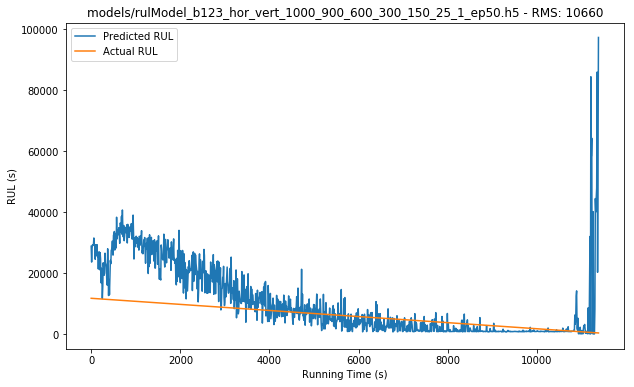

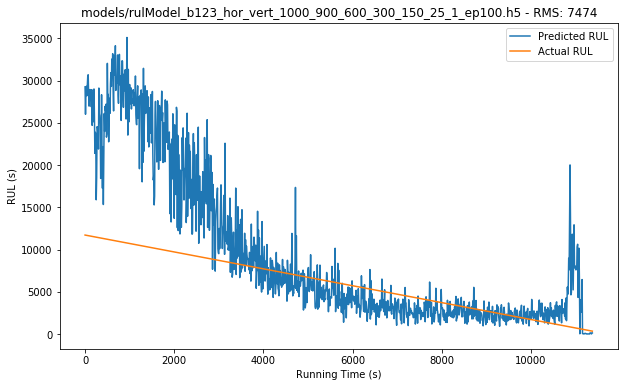

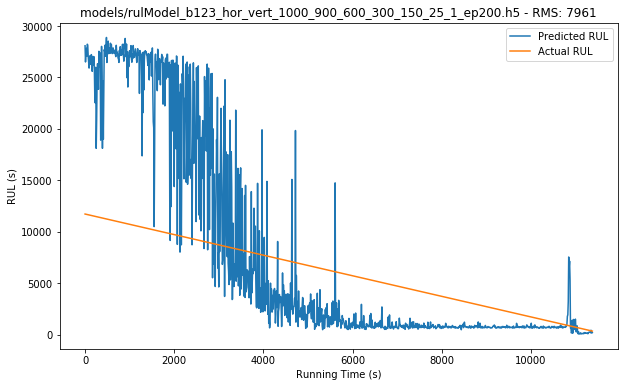

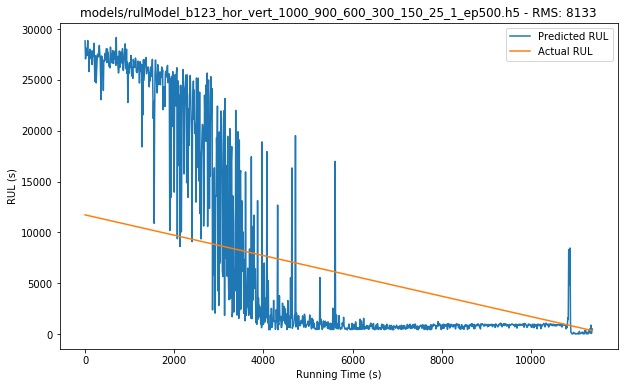

##################
# Test: 1_5
##################
2302/2302 [==============================] - 3s 1ms/step


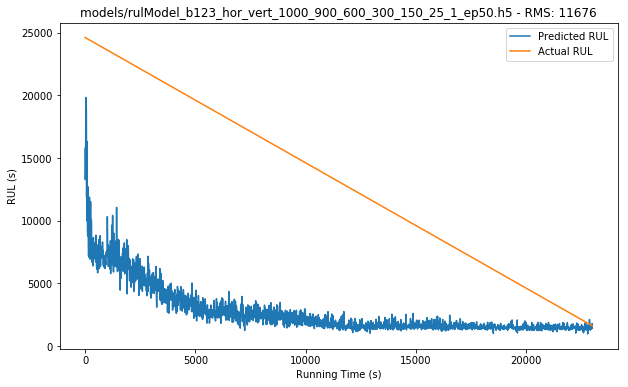

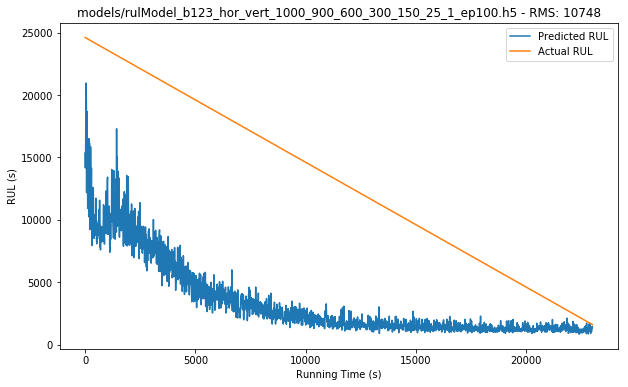

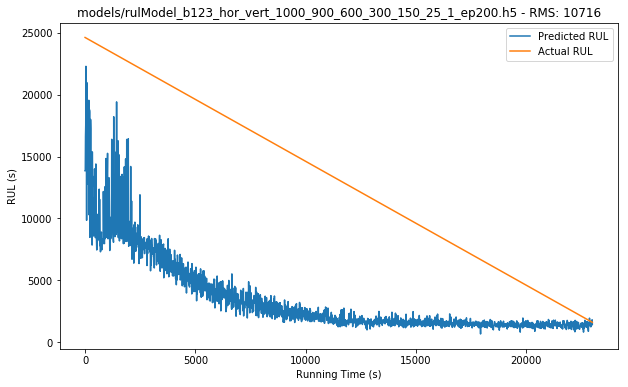

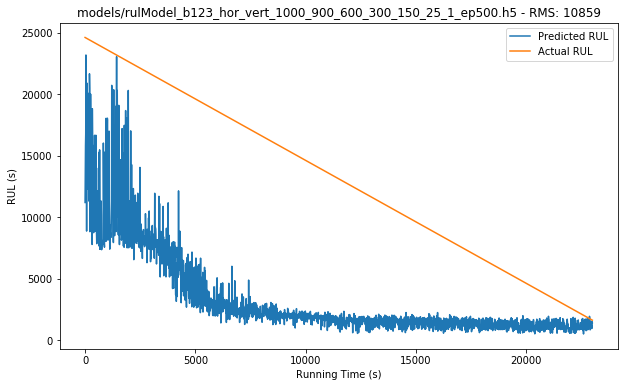

##################
# Test: 1_6
##################
2302/2302 [==============================] - 3s 1ms/step


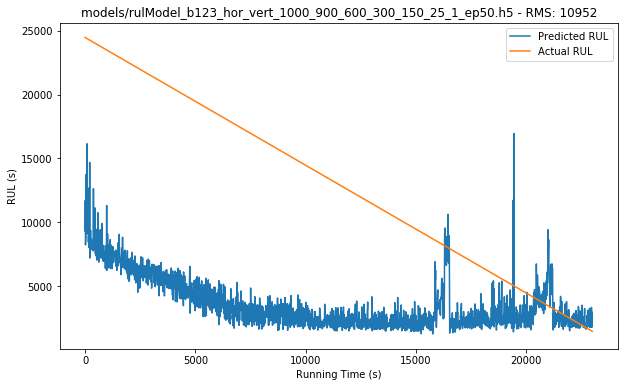

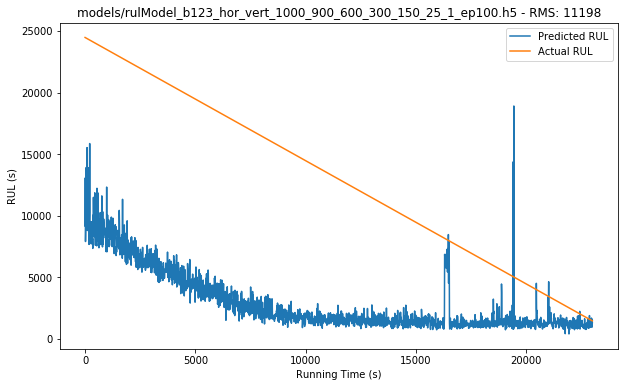

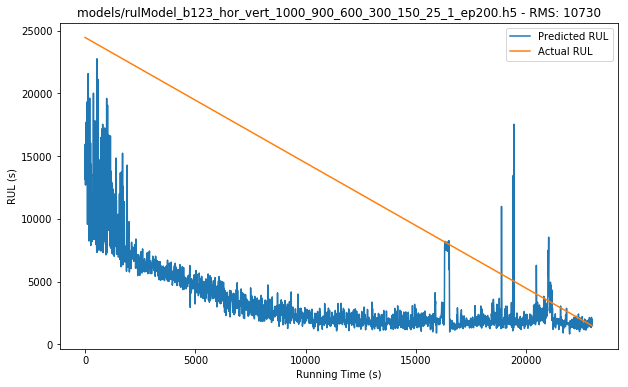

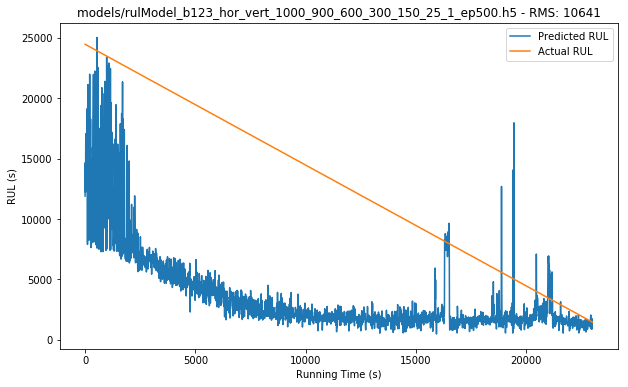

##################
# Test: 1_7
##################
1502/1502 [==============================] - 3s 2ms/step


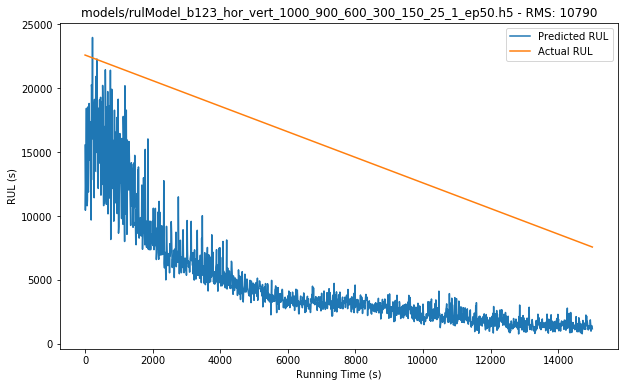

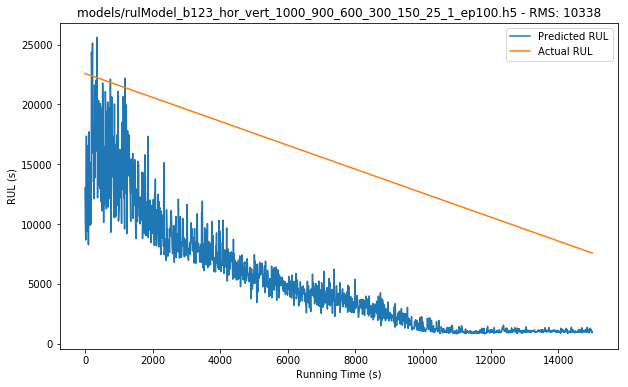

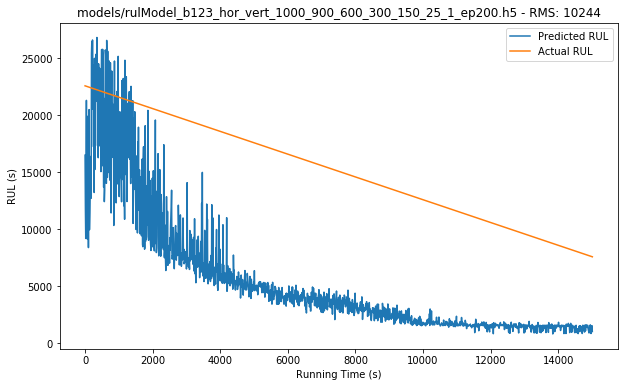

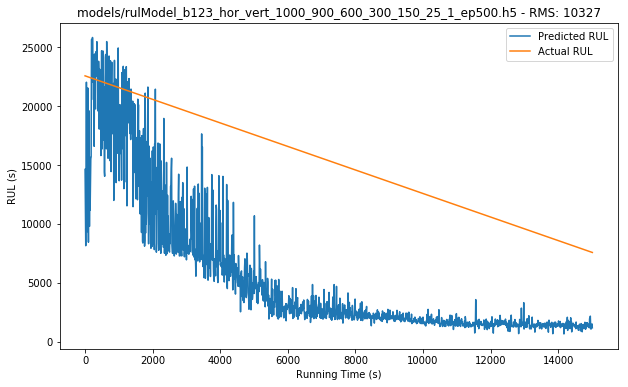

##################
# Test: 2_3
##################
1202/1202 [==============================] - 3s 3ms/step


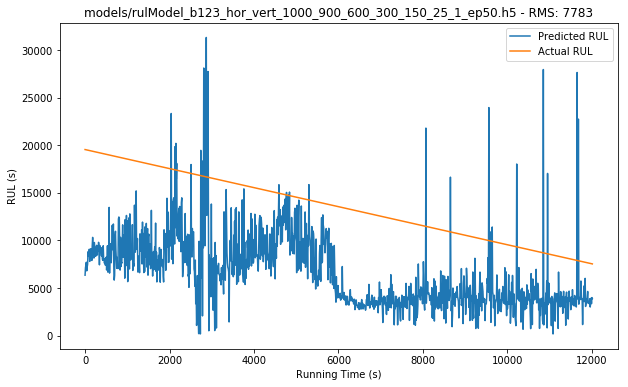

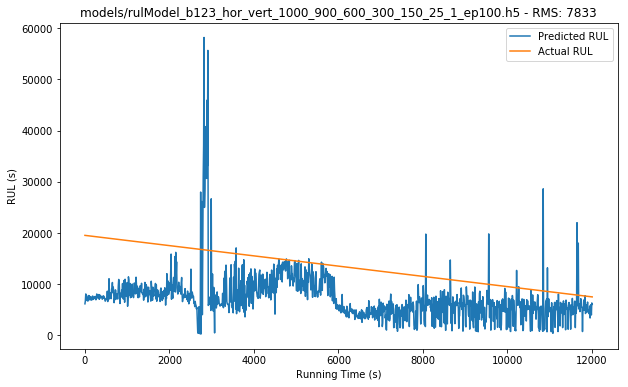

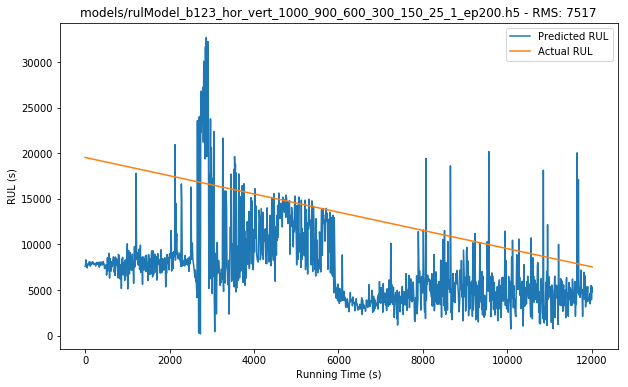

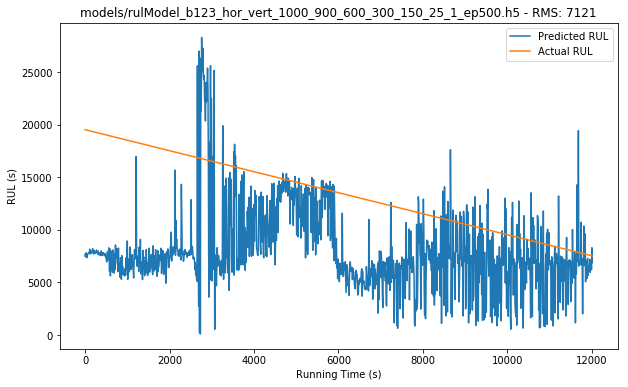

##################
# Test: 2_4
##################
612/612 [==============================] - 3s 5ms/step


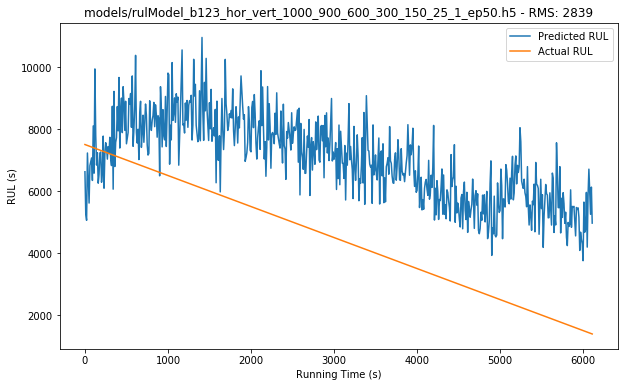

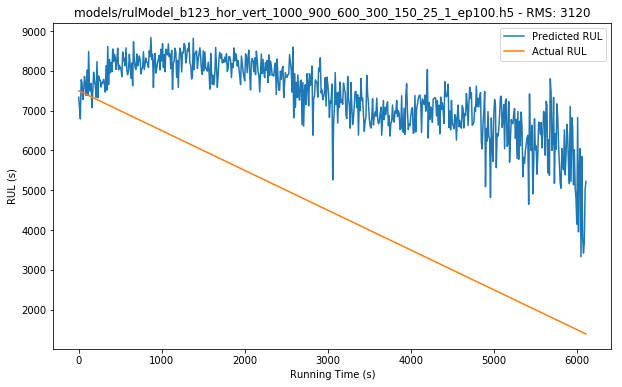

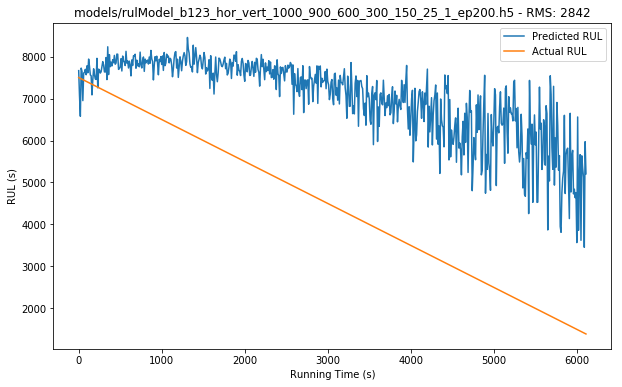

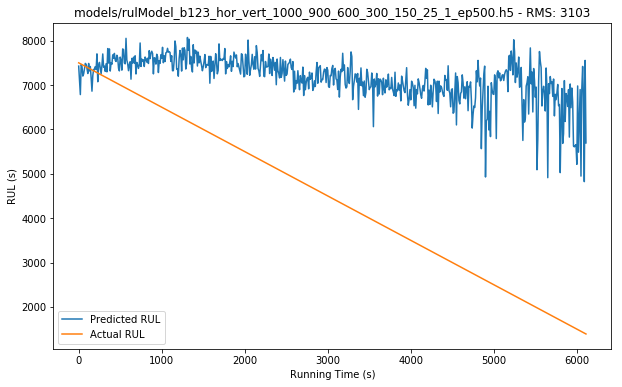

##################
# Test: 2_5
##################
2002/2002 [==============================] - 4s 2ms/step


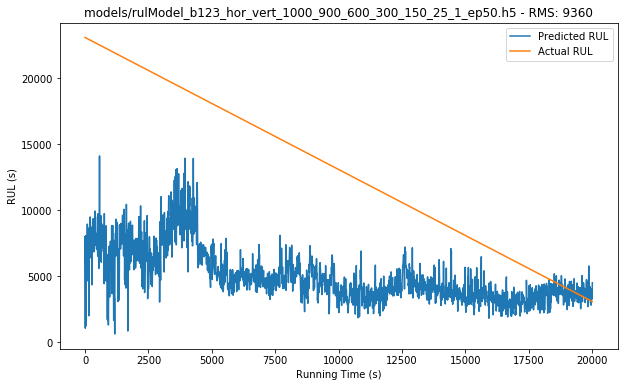

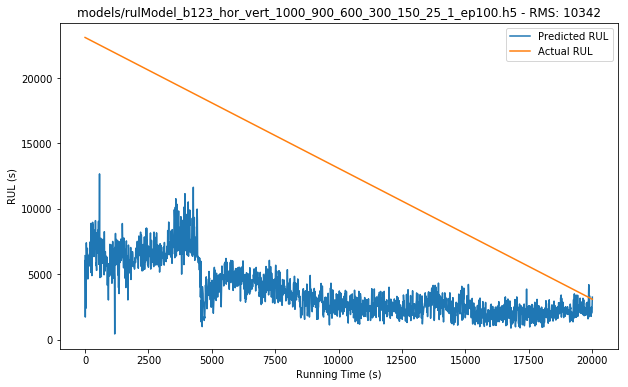

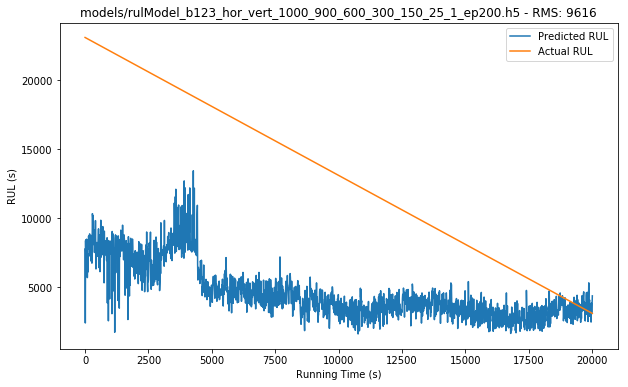

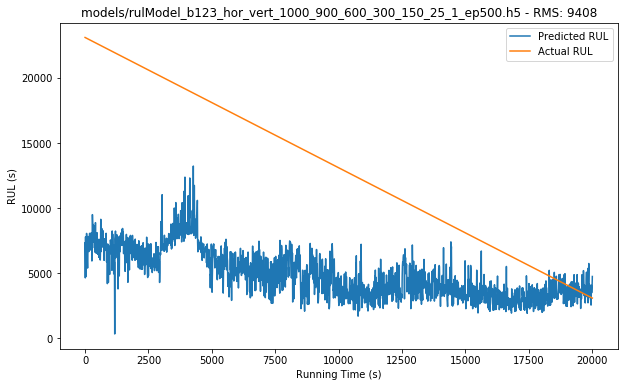

##################
# Test: 2_6
##################
572/572 [==============================] - 4s 7ms/step


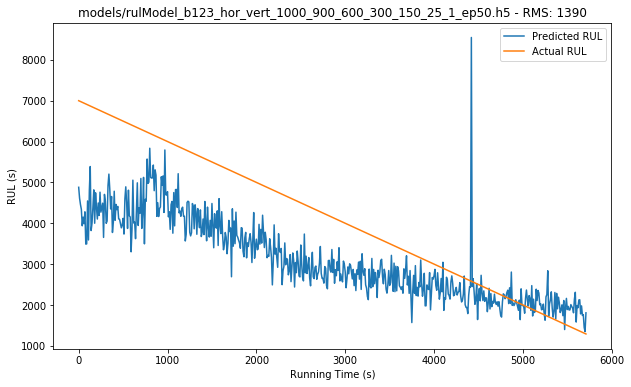

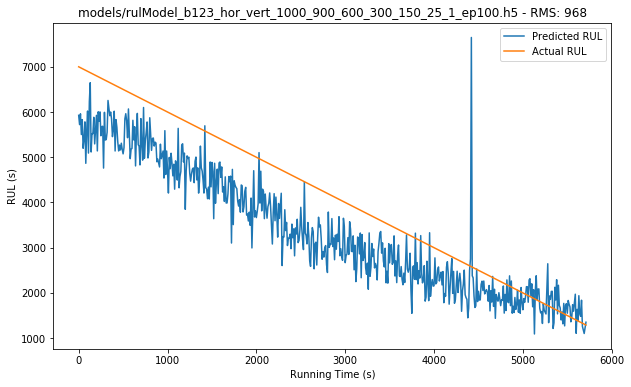

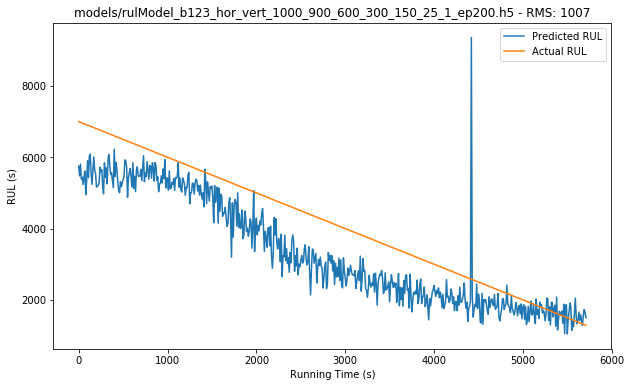

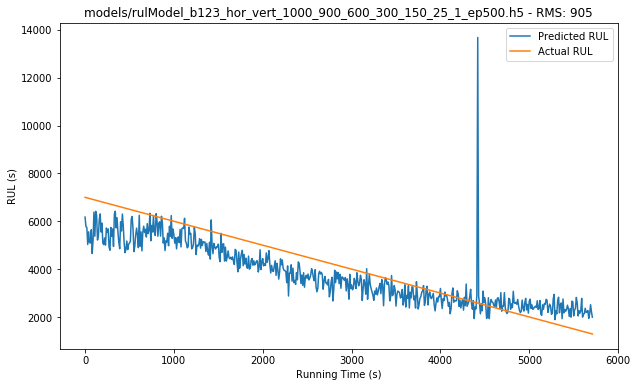

##################
# Test: 2_7
##################
172/172 [==============================] - 4s 22ms/step


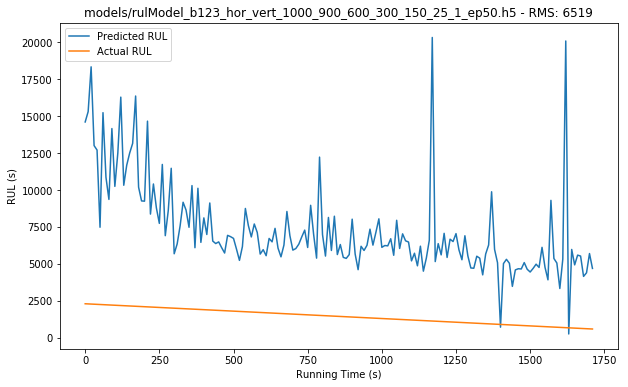

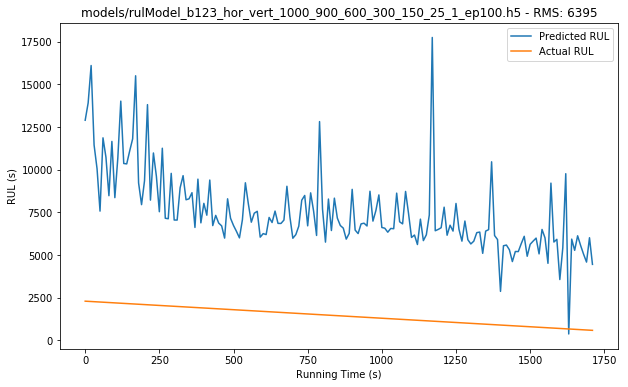

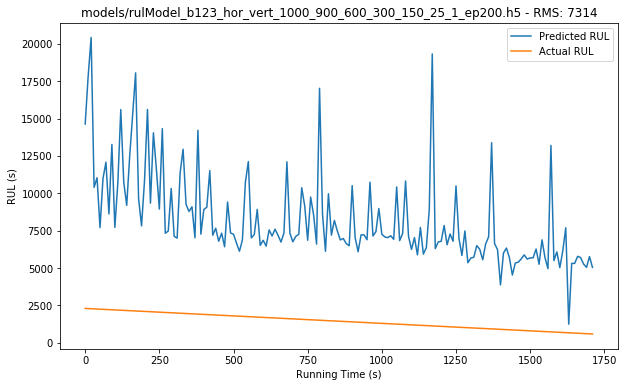

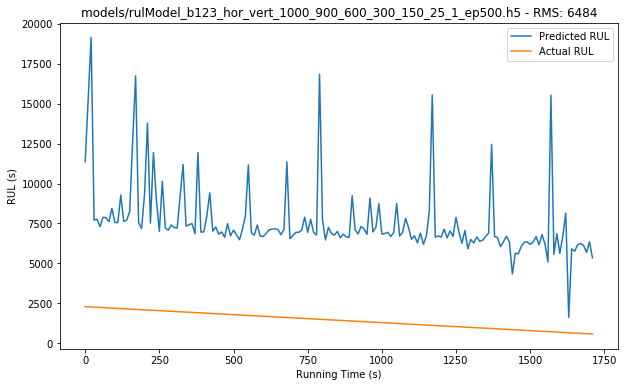

##################
# Test: 3_3
##################
352/352 [==============================] - 4s 12ms/step


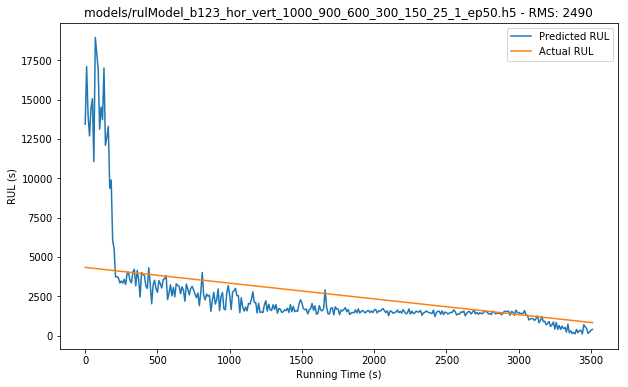

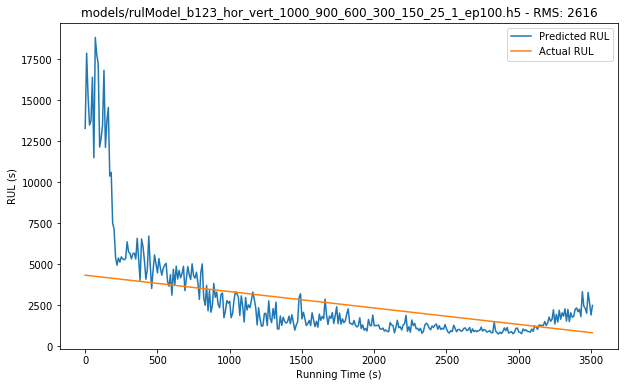

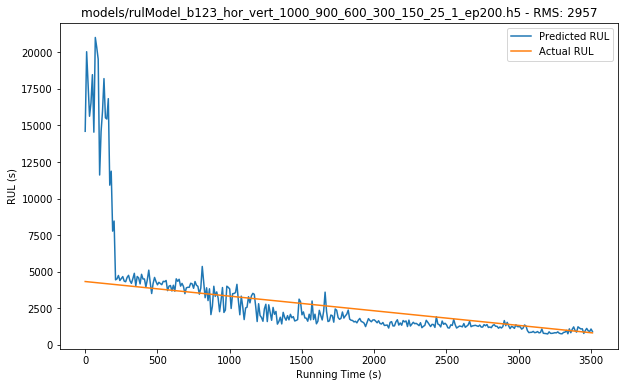

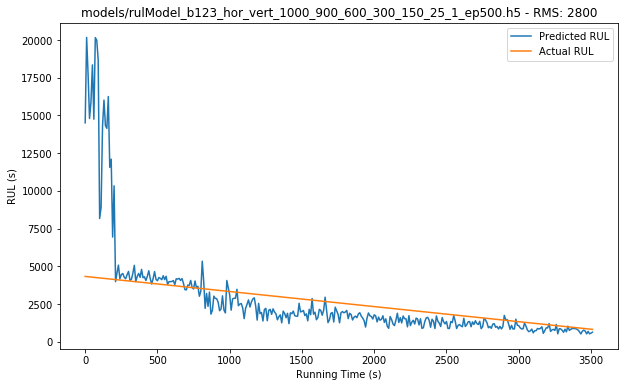

In [11]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)

Epoch 1/50
7534/7534 [==============================] - 11s 2ms/step - loss: 125841347.2891
Epoch 2/50
7534/7534 [==============================] - 2s 260us/step - loss: 125689662.9127
Epoch 3/50
7534/7534 [==============================] - 2s 221us/step - loss: 125400542.4412
Epoch 4/50
7534/7534 [==============================] - 2s 216us/step - loss: 124983252.7826
Epoch 5/50
7534/7534 [==============================] - 2s 216us/step - loss: 124449645.5875
Epoch 6/50
7534/7534 [==============================] - 2s 213us/step - loss: 123811312.5224
Epoch 7/50
7534/7534 [==============================] - 2s 215us/step - loss: 123077517.6682
Epoch 8/50
7534/7534 [==============================] - 2s 221us/step - loss: 122256122.3127
Epoch 9/50
7534/7534 [==============================] - 2s 215us/step - loss: 121355794.3000
Epoch 10/50
7534/7534 [==============================] - 2s 213us/step - loss: 120383415.6772
Epoch 11/50
7534/7534 [==============================] - 2s 216us/step

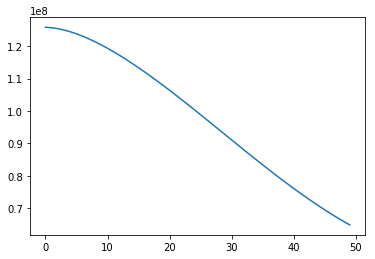

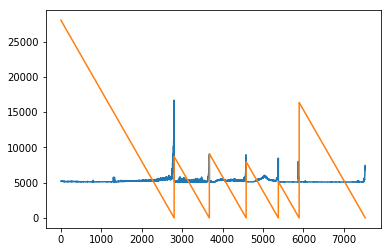

Epoch 1/100
7534/7534 [==============================] - 11s 1ms/step - loss: 125842049.6862
Epoch 2/100
7534/7534 [==============================] - 2s 222us/step - loss: 125686447.5073
Epoch 3/100
7534/7534 [==============================] - 2s 221us/step - loss: 125388219.2302
Epoch 4/100
7534/7534 [==============================] - 2s 237us/step - loss: 124957432.3355
Epoch 5/100
7534/7534 [==============================] - 2s 223us/step - loss: 124406547.6315
Epoch 6/100
7534/7534 [==============================] - 2s 220us/step - loss: 123746210.9689
Epoch 7/100
7534/7534 [==============================] - 2s 220us/step - loss: 122987291.6974
Epoch 8/100
7534/7534 [==============================] - 2s 225us/step - loss: 122139503.6793
Epoch 9/100
7534/7534 [==============================] - 2s 220us/step - loss: 121209602.1874
Epoch 10/100
7534/7534 [==============================] - 2s 222us/step - loss: 120204478.5325
Epoch 11/100
7534/7534 [==============================] - 2s

7534/7534 [==============================] - 2s 222us/step - loss: 51496874.5718
Epoch 89/100
7534/7534 [==============================] - 2s 220us/step - loss: 51448584.1954
Epoch 90/100
7534/7534 [==============================] - 2s 222us/step - loss: 51402192.3334
Epoch 91/100
7534/7534 [==============================] - 2s 223us/step - loss: 51356275.4585
Epoch 92/100
7534/7534 [==============================] - 2s 223us/step - loss: 51309406.3244
Epoch 93/100
7534/7534 [==============================] - 2s 221us/step - loss: 51263593.2923
Epoch 94/100
7534/7534 [==============================] - 2s 221us/step - loss: 51217374.1901
Epoch 95/100
7534/7534 [==============================] - 2s 223us/step - loss: 51171887.6921
Epoch 96/100
7534/7534 [==============================] - 2s 221us/step - loss: 51125545.2933
Epoch 97/100
7534/7534 [==============================] - 2s 221us/step - loss: 51079316.4879
Epoch 98/100
7534/7534 [==============================] - 2s 226us/step -

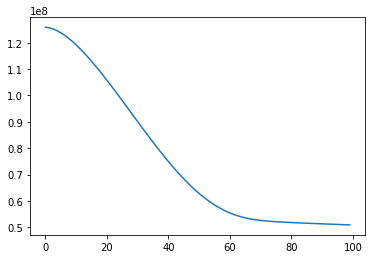

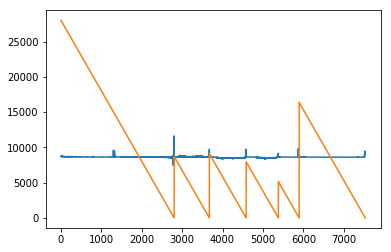

Epoch 1/200
7534/7534 [==============================] - 11s 1ms/step - loss: 125842314.5187
Epoch 2/200
7534/7534 [==============================] - 2s 223us/step - loss: 125687501.3199
Epoch 3/200
7534/7534 [==============================] - 2s 222us/step - loss: 125389307.7462
Epoch 4/200
7534/7534 [==============================] - 2s 229us/step - loss: 124958830.1375
Epoch 5/200
7534/7534 [==============================] - 2s 223us/step - loss: 124409880.6350
Epoch 6/200
7534/7534 [==============================] - 2s 238us/step - loss: 123751795.4977
Epoch 7/200
7534/7534 [==============================] - 2s 228us/step - loss: 122995252.5830
Epoch 8/200
7534/7534 [==============================] - 2s 223us/step - loss: 122147201.5758
Epoch 9/200
7534/7534 [==============================] - 2s 223us/step - loss: 121216551.5031
Epoch 10/200
7534/7534 [==============================] - 2s 223us/step - loss: 120211480.1826
Epoch 11/200
7534/7534 [==============================] - 2s

7534/7534 [==============================] - 2s 229us/step - loss: 51511614.8702
Epoch 89/200
7534/7534 [==============================] - 2s 223us/step - loss: 51463152.8951
Epoch 90/200
7534/7534 [==============================] - 2s 226us/step - loss: 51416810.0802
Epoch 91/200
7534/7534 [==============================] - 2s 224us/step - loss: 51368805.5142
Epoch 92/200
7534/7534 [==============================] - 2s 222us/step - loss: 51322294.8967
Epoch 93/200
7534/7534 [==============================] - 2s 225us/step - loss: 51276322.0780
Epoch 94/200
7534/7534 [==============================] - 2s 224us/step - loss: 51229628.7698
Epoch 95/200
7534/7534 [==============================] - 2s 225us/step - loss: 51183034.1120
Epoch 96/200
7534/7534 [==============================] - 2s 222us/step - loss: 51137138.7937
Epoch 97/200
7534/7534 [==============================] - 2s 226us/step - loss: 51090876.7412
Epoch 98/200
7534/7534 [==============================] - 2s 223us/step -

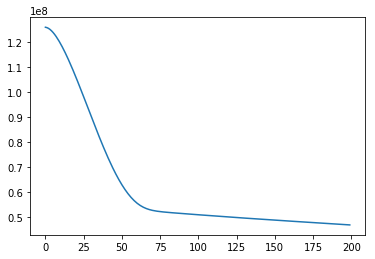

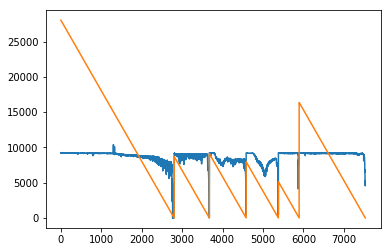

Epoch 1/500
7534/7534 [==============================] - 11s 1ms/step - loss: 125845337.4080
Epoch 2/500
7534/7534 [==============================] - 2s 210us/step - loss: 125711944.9705
Epoch 3/500
7534/7534 [==============================] - 2s 209us/step - loss: 125455735.1909
Epoch 4/500
7534/7534 [==============================] - 2s 209us/step - loss: 125083577.1617
Epoch 5/500
7534/7534 [==============================] - 2s 210us/step - loss: 124605982.3329
Epoch 6/500
7534/7534 [==============================] - 2s 211us/step - loss: 124035358.5092
Epoch 7/500
7534/7534 [==============================] - 2s 208us/step - loss: 123379016.0680
Epoch 8/500
7534/7534 [==============================] - 2s 213us/step - loss: 122643967.5115
Epoch 9/500
7534/7534 [==============================] - 2s 212us/step - loss: 121836041.1022
Epoch 10/500
7534/7534 [==============================] - 2s 212us/step - loss: 120964502.4858
Epoch 11/500
7534/7534 [==============================] - 2s

Epoch 88/500
7534/7534 [==============================] - 2s 211us/step - loss: 51842756.5224
Epoch 89/500
7534/7534 [==============================] - 2s 208us/step - loss: 51793924.5915
Epoch 90/500
7534/7534 [==============================] - 2s 210us/step - loss: 51745981.7000
Epoch 91/500
7534/7534 [==============================] - 2s 211us/step - loss: 51698773.9942
Epoch 92/500
7534/7534 [==============================] - 2s 211us/step - loss: 51653095.2965
Epoch 93/500
7534/7534 [==============================] - 2s 220us/step - loss: 51607439.6538
Epoch 94/500
7534/7534 [==============================] - 2s 208us/step - loss: 51562473.2551
Epoch 95/500
7534/7534 [==============================] - 2s 214us/step - loss: 51517448.2888
Epoch 96/500
7534/7534 [==============================] - 2s 211us/step - loss: 51473397.8147
Epoch 97/500
7534/7534 [==============================] - 2s 209us/step - loss: 51429268.8718
Epoch 98/500
7534/7534 [==============================] - 2s

7534/7534 [==============================] - 2s 217us/step - loss: 45275011.5615
Epoch 261/500
7534/7534 [==============================] - 2s 212us/step - loss: 45239938.4709
Epoch 262/500
7534/7534 [==============================] - 2s 227us/step - loss: 45205124.4892
Epoch 263/500
7534/7534 [==============================] - 2s 222us/step - loss: 45170275.2684
Epoch 264/500
7534/7534 [==============================] - 2s 215us/step - loss: 45135764.0340
Epoch 265/500
7534/7534 [==============================] - 2s 216us/step - loss: 45100850.3605
Epoch 266/500
7534/7534 [==============================] - 2s 219us/step - loss: 45066130.9212
Epoch 267/500
7534/7534 [==============================] - 2s 221us/step - loss: 45031082.8628
Epoch 268/500
7534/7534 [==============================] - 2s 216us/step - loss: 44996517.6724
Epoch 269/500
7534/7534 [==============================] - 2s 218us/step - loss: 44961750.9297
Epoch 270/500
7534/7534 [==============================] - 2s 21

7534/7534 [==============================] - 2s 209us/step - loss: 40163507.2854
Epoch 433/500
7534/7534 [==============================] - 2s 211us/step - loss: 40141004.2570
Epoch 434/500
7534/7534 [==============================] - 2s 211us/step - loss: 40119149.8667
Epoch 435/500
7534/7534 [==============================] - 2s 210us/step - loss: 40097098.6440
Epoch 436/500
7534/7534 [==============================] - 2s 208us/step - loss: 40075084.9716
Epoch 437/500
7534/7534 [==============================] - 2s 213us/step - loss: 40052990.2649
Epoch 438/500
7534/7534 [==============================] - 2s 209us/step - loss: 40030952.3801
Epoch 439/500
7534/7534 [==============================] - 2s 208us/step - loss: 40009326.8415
Epoch 440/500
7534/7534 [==============================] - 2s 215us/step - loss: 39987329.5301
Epoch 441/500
7534/7534 [==============================] - 2s 245us/step - loss: 39965866.3860
Epoch 442/500
7534/7534 [==============================] - 2s 24

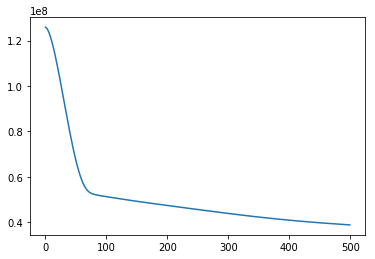

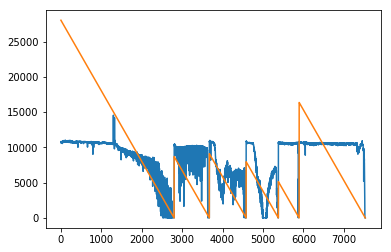

In [12]:
layersizes = [50]
epochss = [50, 100, 200, 500]
for epochs in epochss:
    rulModel, history = util.trainModel(X_train, Y_train, layersizes, epochs, expName)

##################
# Test: 1_3
##################
1802/1802 [==============================] - 4s 2ms/step


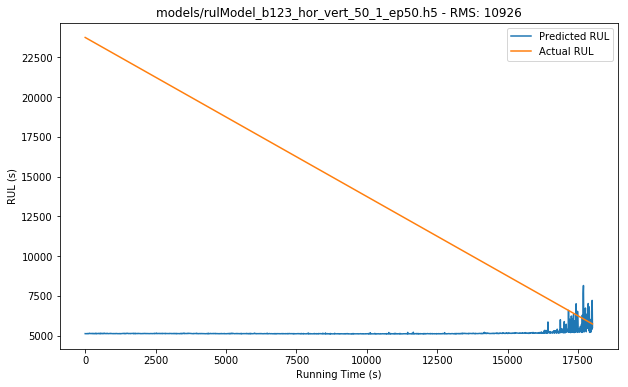

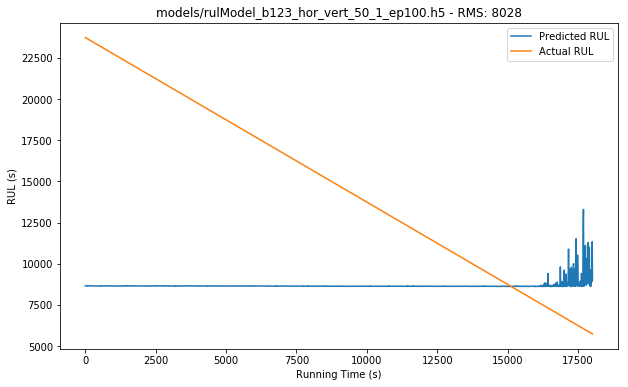

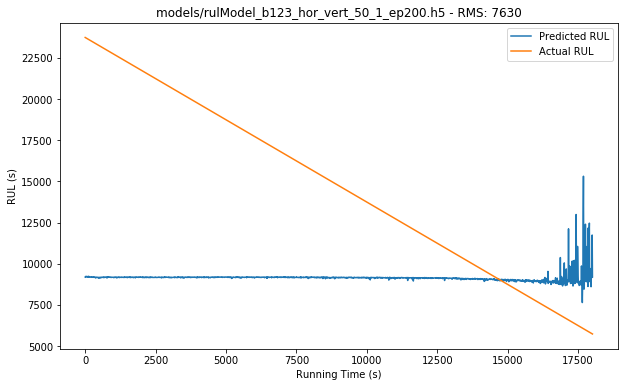

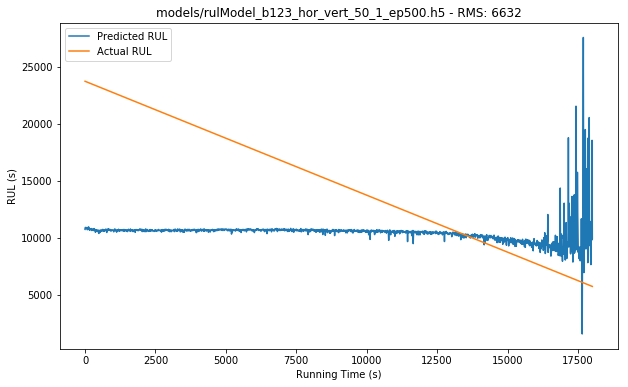

##################
# Test: 1_4
##################
1139/1139 [==============================] - 4s 4ms/step


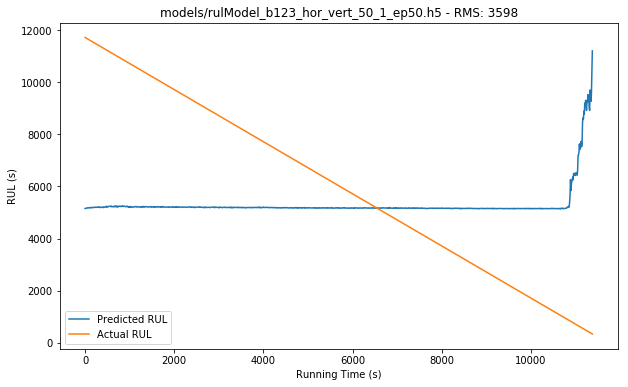

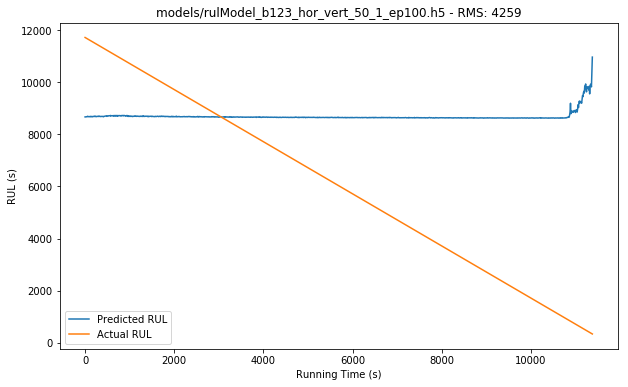

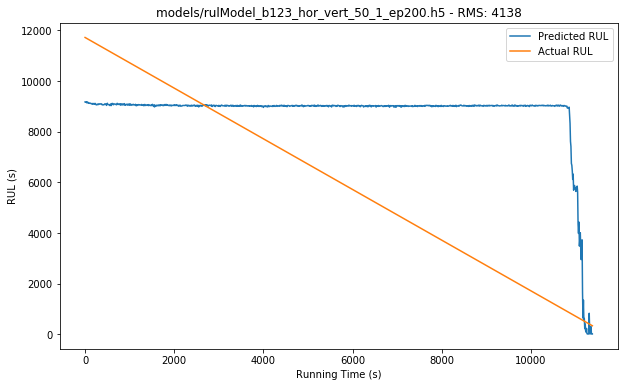

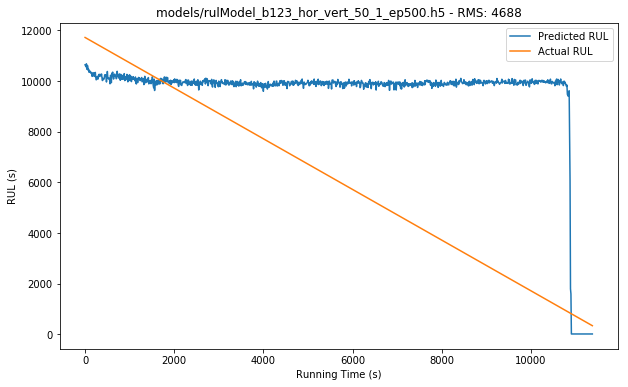

##################
# Test: 1_5
##################
2302/2302 [==============================] - 5s 2ms/step


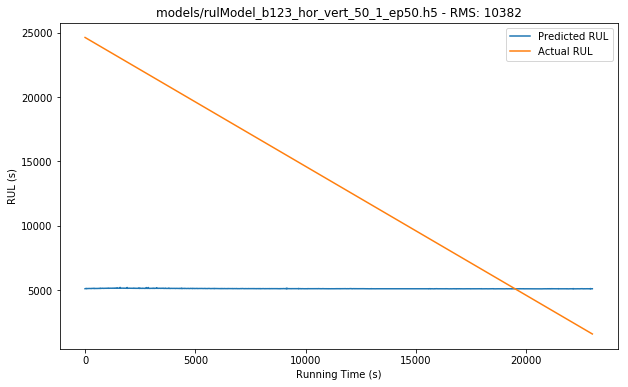

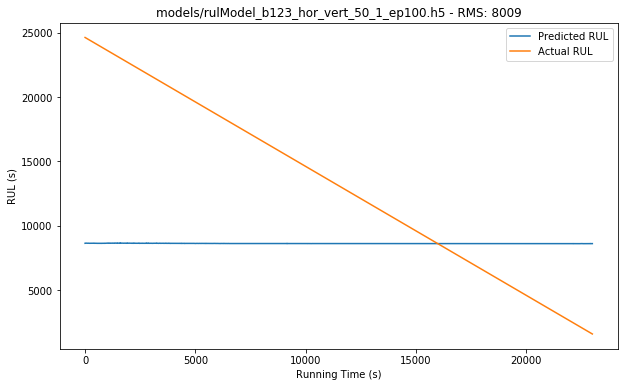

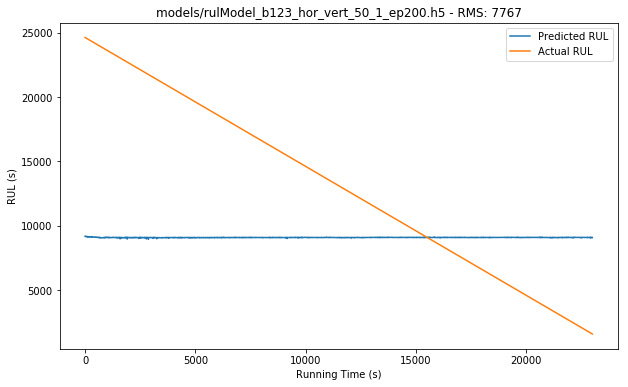

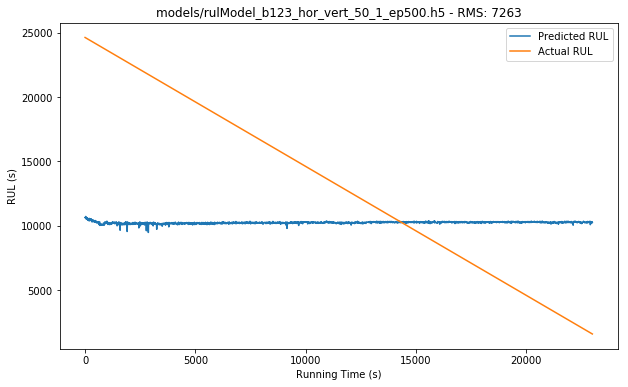

##################
# Test: 1_6
##################
2302/2302 [==============================] - 5s 2ms/step


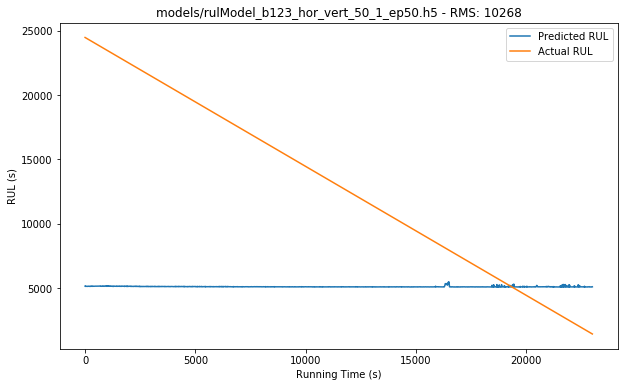

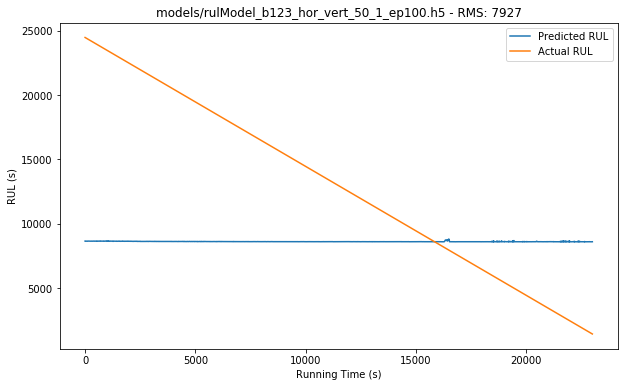

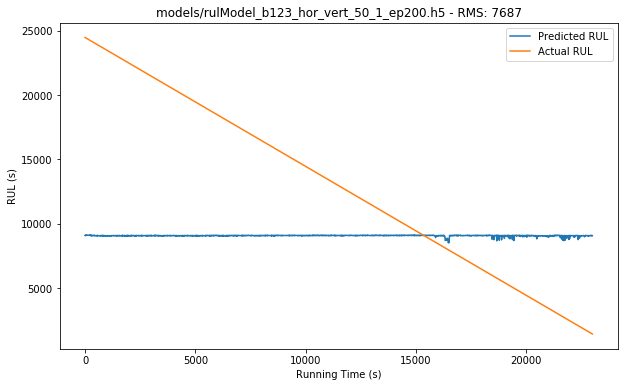

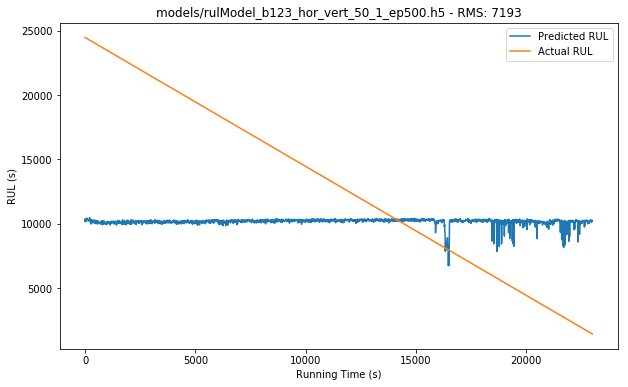

##################
# Test: 1_7
##################
1502/1502 [==============================] - 5s 3ms/step


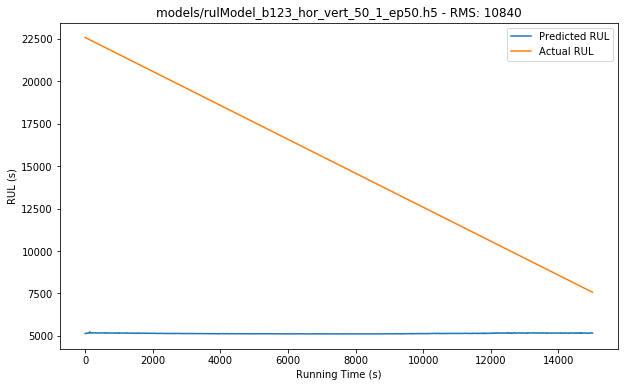

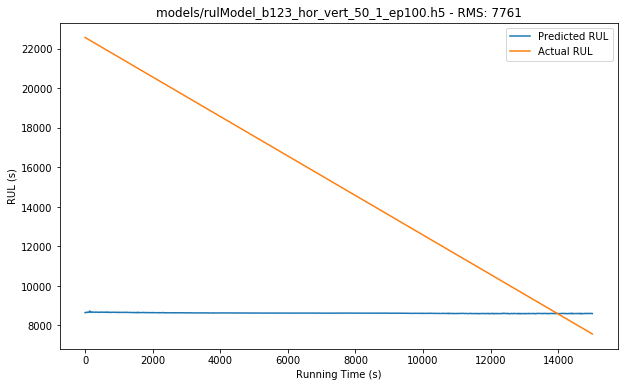

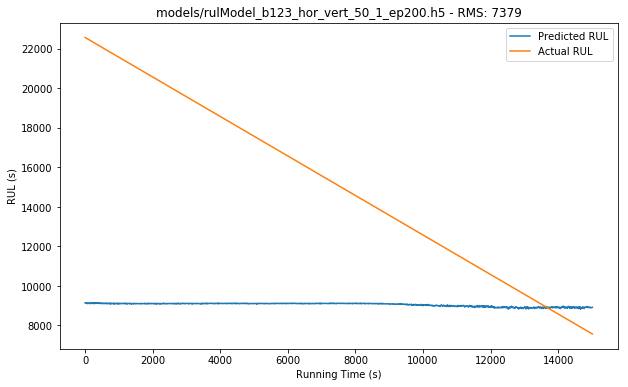

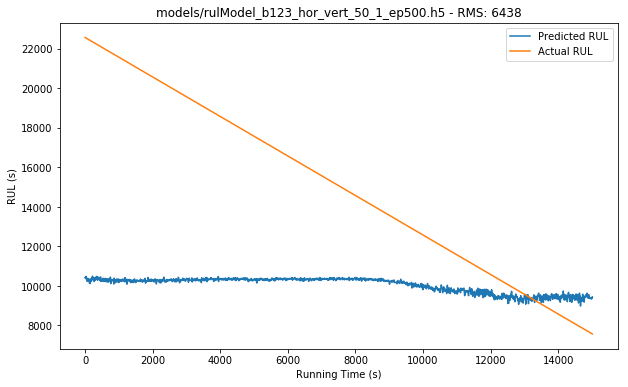

##################
# Test: 2_3
##################
1202/1202 [==============================] - 5s 4ms/step


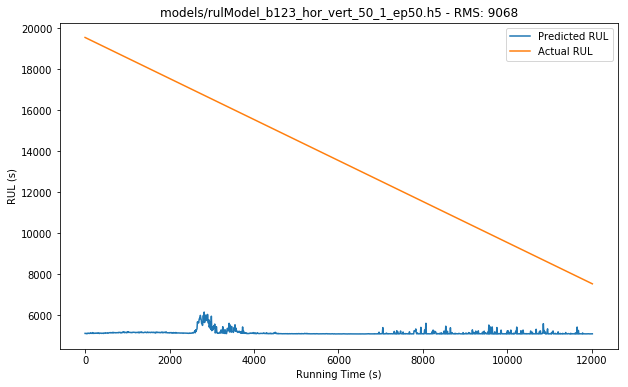

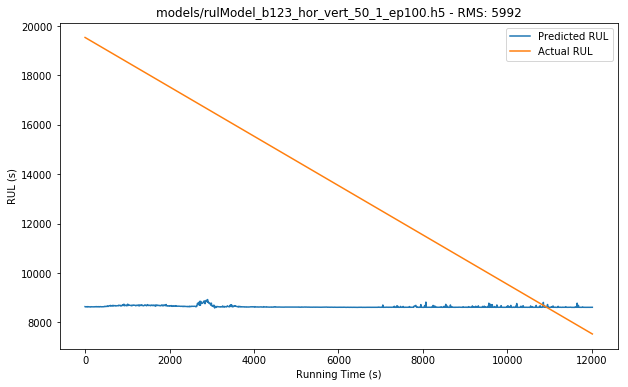

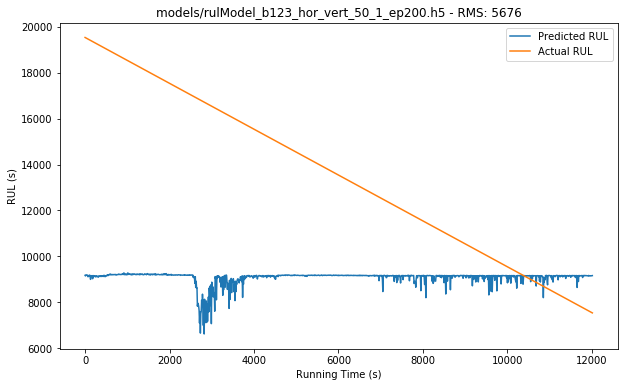

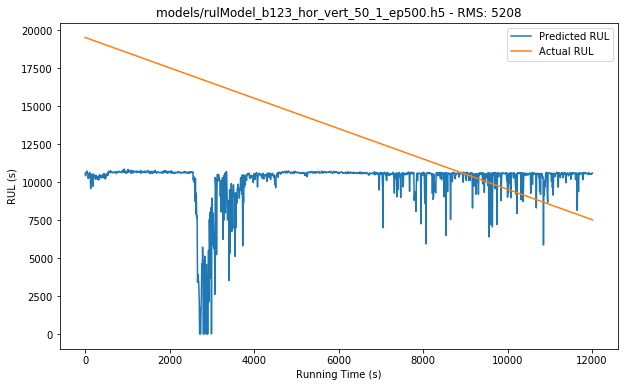

##################
# Test: 2_4
##################
612/612 [==============================] - 5s 8ms/step


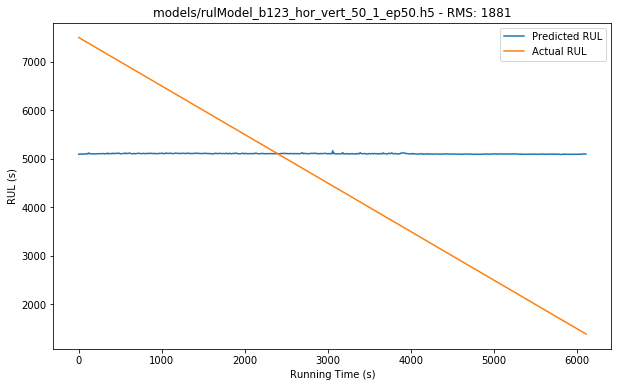

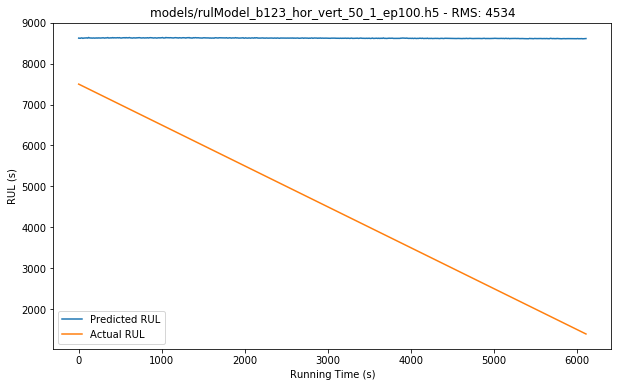

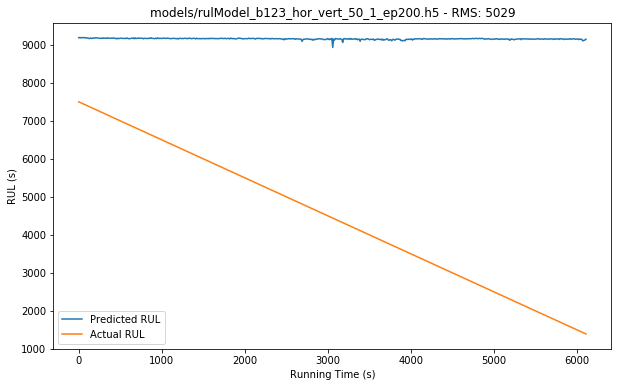

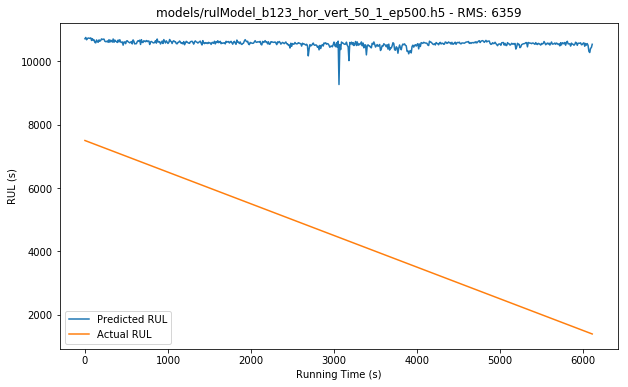

##################
# Test: 2_5
##################
2002/2002 [==============================] - 5s 3ms/step


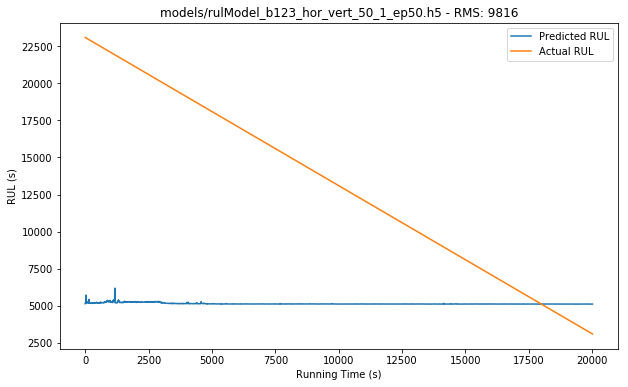

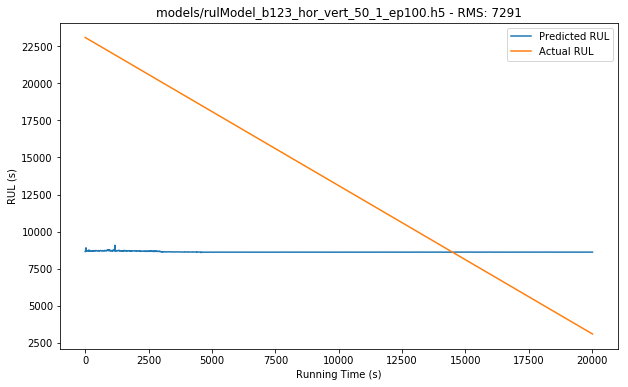

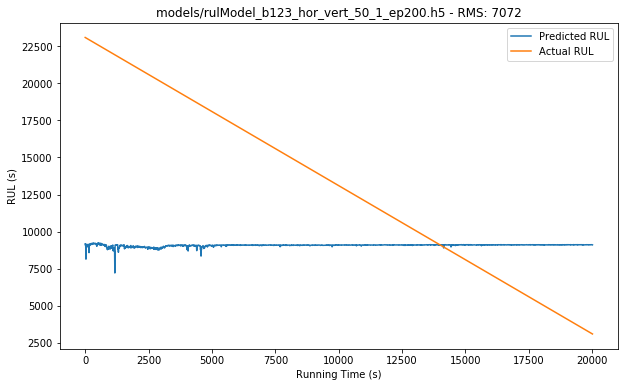

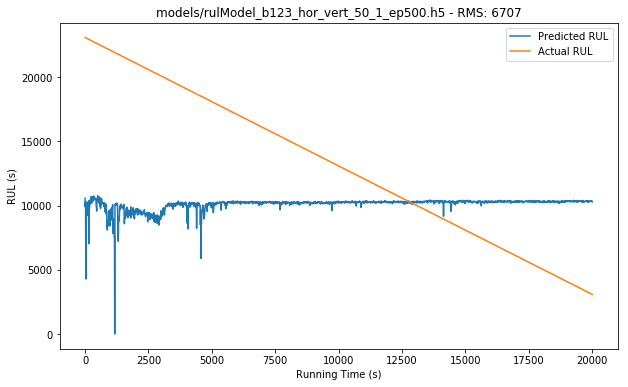

##################
# Test: 2_6
##################
572/572 [==============================] - 5s 9ms/step


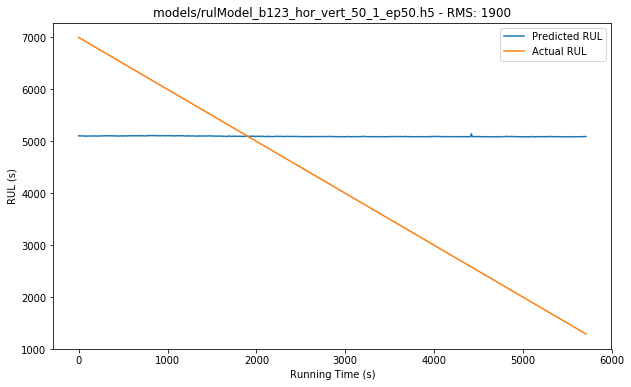

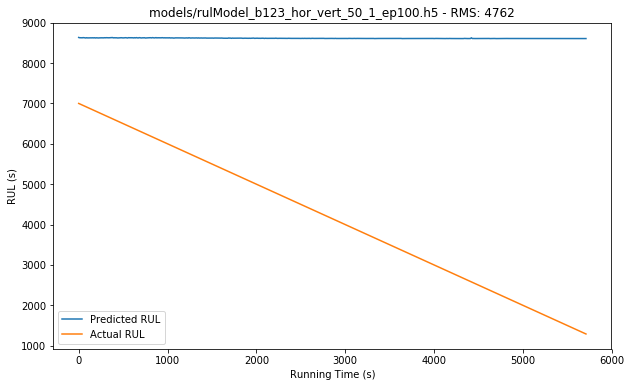

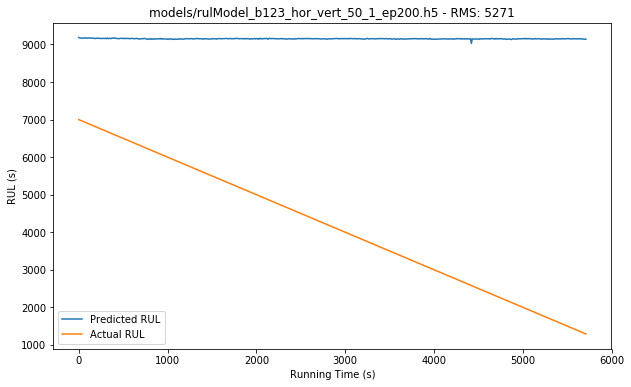

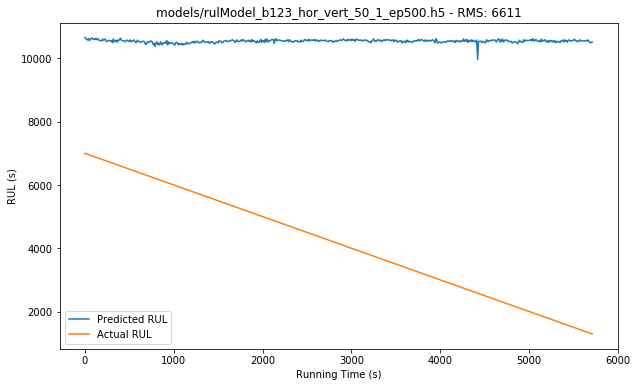

##################
# Test: 2_7
##################
172/172 [==============================] - 5s 30ms/step


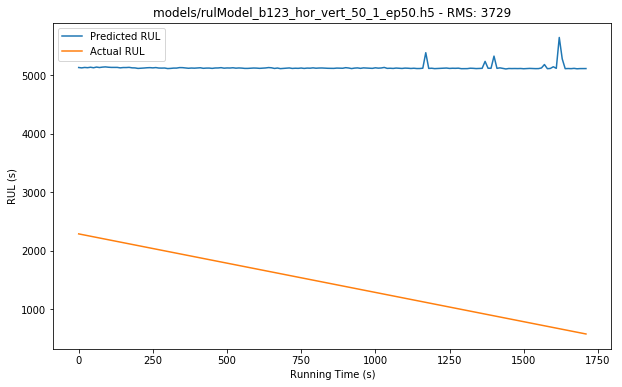

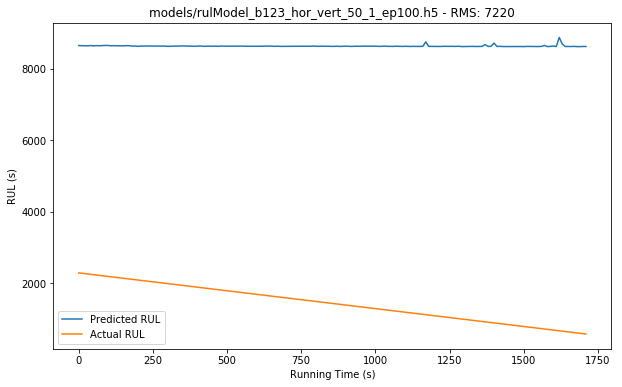

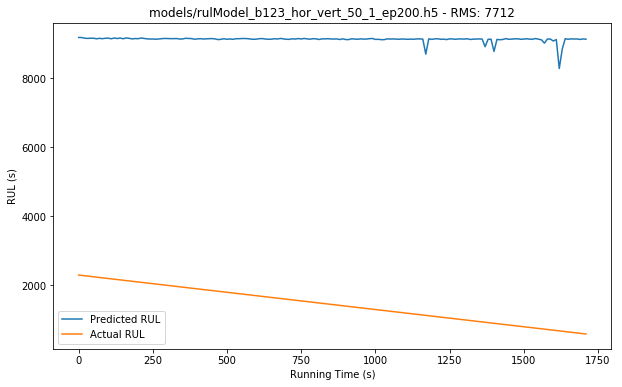

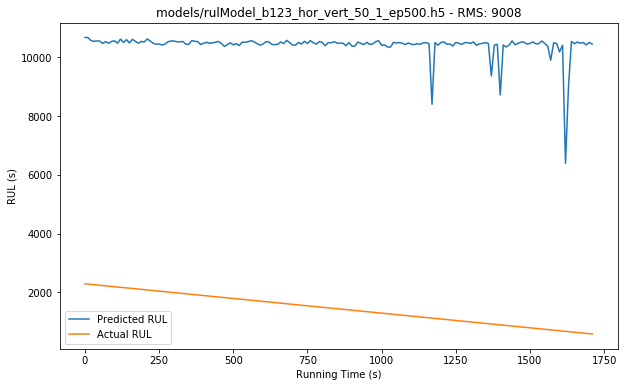

##################
# Test: 3_3
##################
352/352 [==============================] - 6s 17ms/step


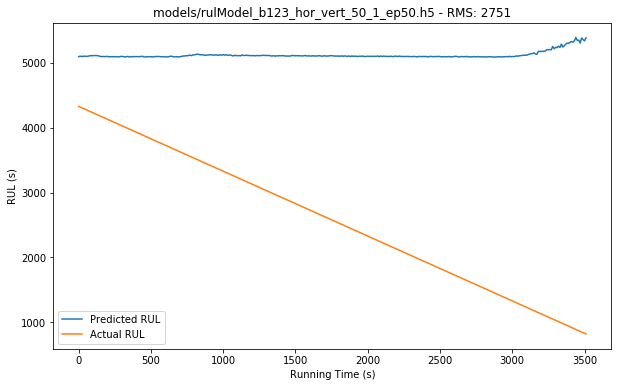

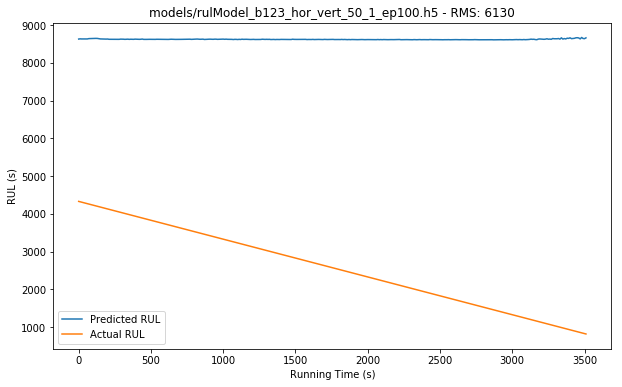

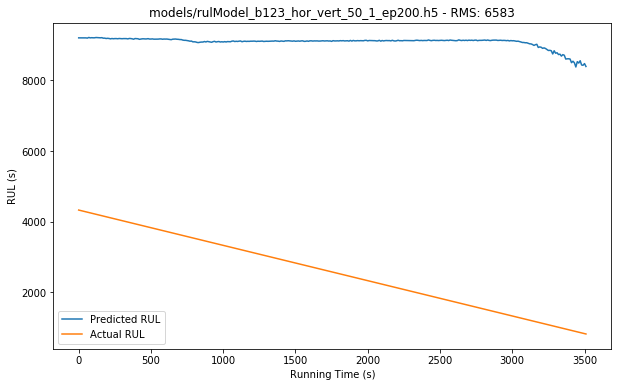

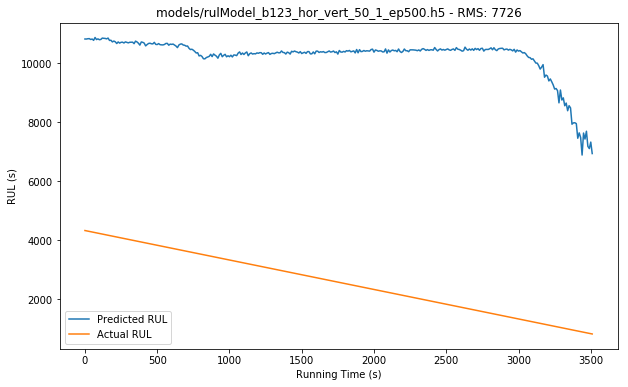

In [13]:
for testIndex in range(len(testspecs)):
    print('##################\n# Test: {:s}\n##################'.format(testspecs[testIndex][0]))
    actRUL =  testspecs[testIndex][1]
    testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
    modelnames = [util.getModelName(layersizes, epochs, expName) for epochs in epochss]
    util.evaluate_spectro(modelnames, testSpectro, actRUL)